# Presentation

## Presentation Overview

## Original Prompt

Microsoft Azure Predictive Maintenance Simulation Data

########################################################################################################################################################
### 														Context / Background																	 ###
########################################################################################################################################################

This an example data source which can be used for Predictive Maintenance Model Building. It consistes of 5 csv file and one .txt readme file. The contents of the CSV files will include:
- Machine conditions and usage: The operating conditions of a machine e.g. data collected from sensors.
- Failure history: The failure history of a machine or component within the machine.
- Maintenance history: The repair history of a machine, e.g. error codes, previous maintenance activities or component replacements.
- Machine features: The features of a machine, e.g. engine size, make and model, location.

########################################################################################################################################################
### 														Data / File Descriptions   																 ###
########################################################################################################################################################

- **Telemetry Time Series Data (PdM_telemetry.csv)**: It consists of hourly average of voltage, rotation, pressure, vibration collected from 100 machines for the year 2015.

- **Error (PdM_errors.csv)**: These are errors encountered by the machines while in operating condition. Since, these errors don't shut down the machines, these are not considered as failures. The error date and times are rounded to the closest hour since the telemetry data is collected at an hourly rate.

- **Maintenance (PdM_maint.csv)**: If a component of a machine is replaced, that is captured as a record in this table. Components are replaced under two situations: 1. During the regular scheduled visit, the technician replaced it (Proactive Maintenance) 2. A component breaks down and then the technician does an unscheduled maintenance to replace the component (Reactive Maintenance). This is considered as a failure and corresponding data is captured under Failures. Maintenance data has both 2014 and 2015 records. This data is rounded to the closest hour since the telemetry data is collected at an hourly rate.

- **Failures (PdM_failures.csv)**: Each record represents replacement of a component due to failure. This data is a subset of Maintenance data. This data is rounded to the closest hour since the telemetry data is collected at an hourly rate.

- **Metadata of Machines (PdM_Machines.csv)**: Model type & age of the Machines.

########################################################################################################################################################
### 														Technical Assessment Tasks 																 ###
########################################################################################################################################################
- Prepare a presentation (can be Powerpoint / Google Slides / Jupyter Notebook / Markdown) to provide your finding with the following results

    - **Part 1: Hypothesis Testing** - derive 2 hypothesis of your choice using the 5 csv provided
        - Example hypothesis 1 -- 60% of the machine exhibited Error 1 90% of the time from 2015 to 2018
        - Example hypothesis 2 -- 80% of machine type 2 failed within the first 50% of their "life span"

    - **Part 2: Model Building and Evaluation** - 
        - Forecast the voltage ('volt') of machineID = 68 (provide the forecasting uncertainty) for 6 hours after '2015-12-13 00:00:00' (i.e. between '2015-12-13 00:00:00' to '2015-12-13 06:00:00')

########################################################################################################################################################
### 														Technical Assessment Factors															 ###
########################################################################################################################################################

You are being assessed directly on your capabilities and approaches to:
**Part 1: Hypothesis Testing** - 
- Hypothesis Formation, 
- Statistics, 
- Visualization, and 
- Exploratory Data Analysis (EDA)

**Part 2: Model Building and Evaluation**
- Your thought process to select proper forecasting techniques, 
- How you evaluate their performance, 
- What assumption(s) do you use to draw conclusion about the result

It is important that you focus on the practicality of your approach on both parts (e.g. balancing interpretability vs predictability vs model robustness).

Highlight any next steps you would propose. 

### Acknowledgements
This dataset was available as a part of **Azure AI Notebooks for Predictive Maintenance**. 


### Inspiration

Try to use this data to build Machine Learning models related to Predictive Maintenance.

In [1]:
%pip install manim

  Using cached manim-0.18.1-py3-none-any.whl.metadata (10 kB)
  Using cached pillow-10.3.0-cp312-cp312-macosx_10_10_x86_64.whl.metadata (9.2 kB)
  Using cached click-8.1.7-py3-none-any.whl.metadata (3.0 kB)
  Using cached cloup-3.0.5-py2.py3-none-any.whl.metadata (6.7 kB)
  Using cached isosurfaces-0.1.2-py3-none-any.whl.metadata (3.3 kB)
  Using cached ManimPango-0.5.0-cp312-cp312-macosx_10_9_x86_64.whl.metadata (8.4 kB)
  Using cached mapbox_earcut-1.0.1-cp312-cp312-macosx_10_9_x86_64.whl.metadata (2.1 kB)
  Using cached moderngl-5.10.0-cp312-cp312-macosx_10_9_x86_64.whl.metadata (7.2 kB)
  Using cached moderngl_window-2.4.6-py3-none-any.whl.metadata (8.8 kB)
  Using cached networkx-3.3-py3-none-any.whl.metadata (5.1 kB)
  Using cached numpy-2.0.0-cp312-cp312-macosx_10_9_x86_64.whl.metadata (60 kB)
  Using cached pycairo-1.26.1.tar.gz (346 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using

In [2]:
from manim import *  # or: from manimlib import *

from manim_slides import Slide


class BasicExample(Slide):
    def construct(self):
        circle = Circle(radius=3, color=BLUE)
        dot = Dot()

        self.play(GrowFromCenter(circle))
        self.next_slide()  # Waits user to press continue to go to the next slide

        self.next_slide(loop=True)  # Start loop
        self.play(MoveAlongPath(dot, circle), run_time=2, rate_func=linear)
        self.next_slide()  # This will start a new non-looping slide

        self.play(dot.animate.move_to(ORIGIN))

ModuleNotFoundError: No module named 'manim'

In [ ]:
manim-slides render example.py BasicExample
# or use ManimGL
manim-slides render --GL example.py BasicExample

In [12]:
%pip install pandas numpy matplotlib seaborn scipy

  Using cached pandas-2.2.2-cp312-cp312-macosx_10_9_x86_64.whl.metadata (19 kB)
  Using cached numpy-2.0.0-cp312-cp312-macosx_10_9_x86_64.whl.metadata (60 kB)
  Using cached matplotlib-3.9.0-cp312-cp312-macosx_10_12_x86_64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached scipy-1.13.1-cp312-cp312-macosx_10_9_x86_64.whl.metadata (60 kB)
  Using cached pytz-2024.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.1-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached contourpy-1.2.1-cp312-cp312-macosx_10_9_x86_64.whl.metadata (5.8 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.53.0-cp312-cp312-macosx_10_9_universal2.whl.metadata (162 kB)
  Using cached kiwisolver-1.4.5-cp312-cp312-macosx_10_9_x86_64.whl.metadata (6.4 kB)
  Using cached pillow-10.3.0-cp312-cp312-macosx_10_10_x86_64.whl.metadata (9.2 kB)
  Using cached pyparsing-3.1.2-py3-none-any.whl.metadata (5.1 kB)
Using c

         Missing Values  % Missing
failure          876087  99.872094
comp             874241  99.661654
errorID          873285  99.552672


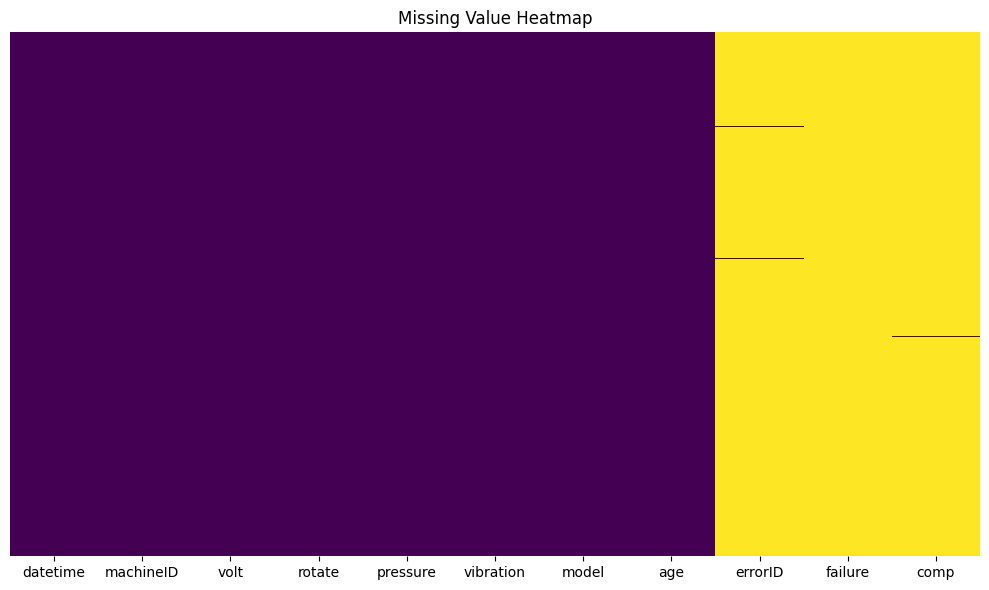

Outliers in volt:
IQR method: 7480 outliers
Z-score method: 3049 outliers


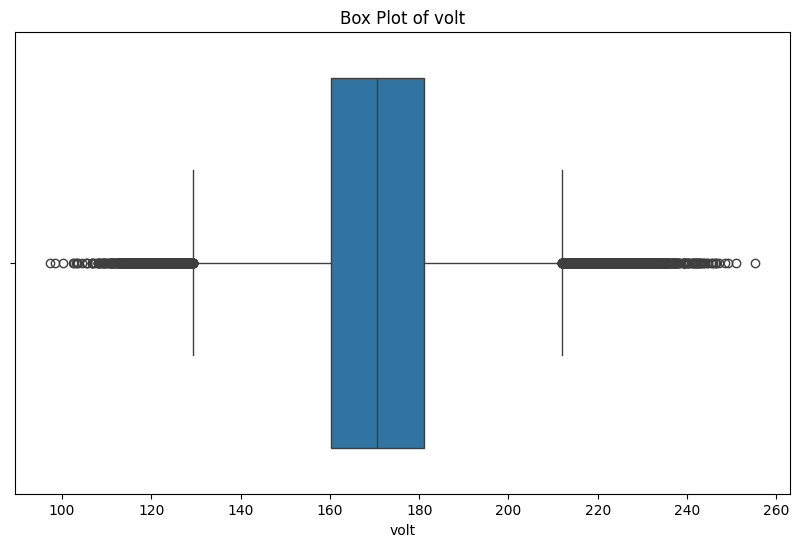

Outliers in rotate:
IQR method: 8595 outliers
Z-score method: 3506 outliers


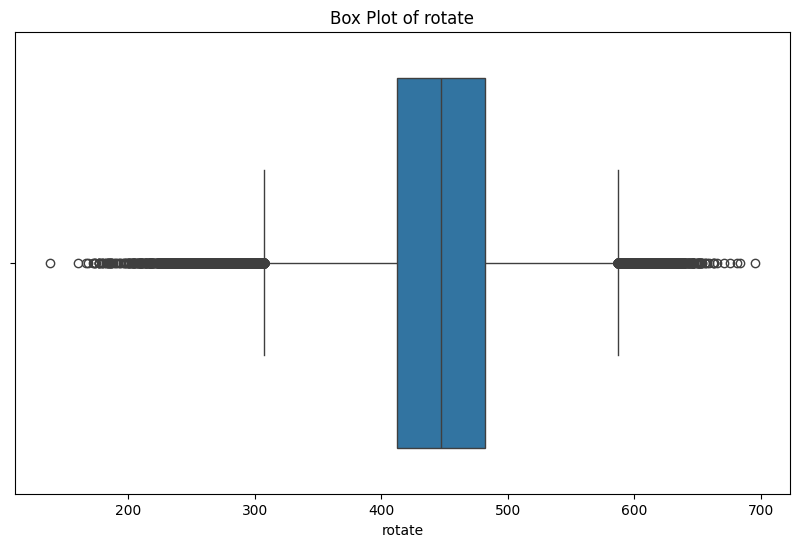

Outliers in pressure:
IQR method: 15634 outliers
Z-score method: 6886 outliers


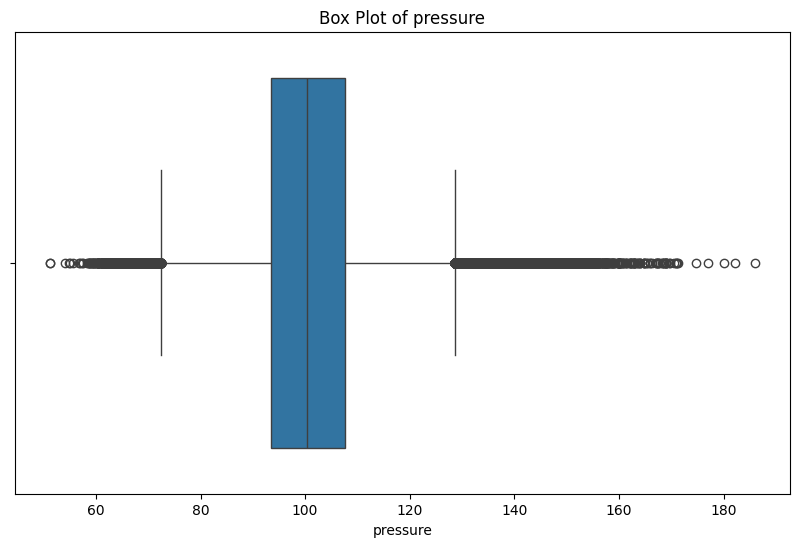

Outliers in vibration:
IQR method: 11146 outliers
Z-score method: 4746 outliers


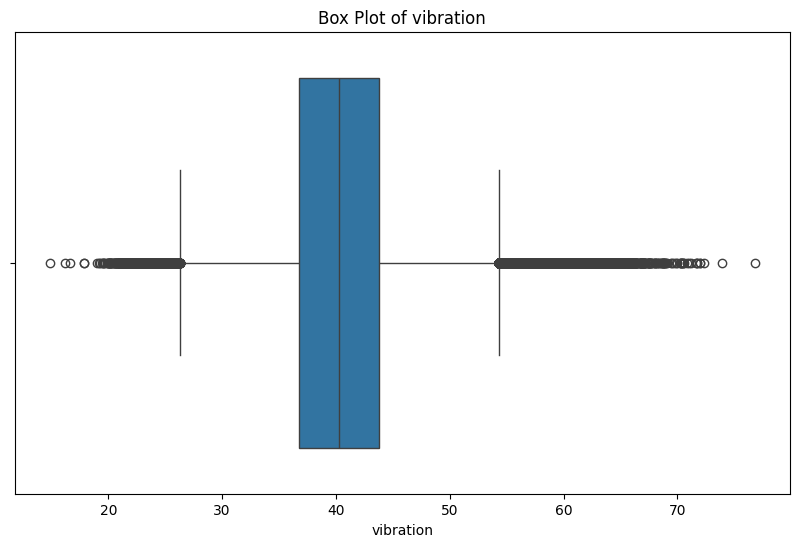

Date range inconsistency: Expected 2015-01-01 00:00:00 to 2015-12-31 00:00:00, got 2015-01-01 06:00:00 to 2016-01-01 06:00:00


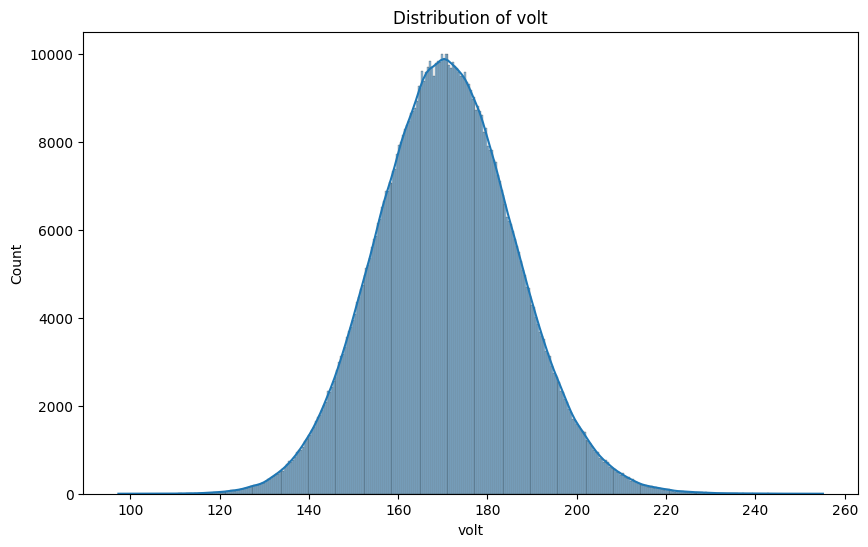

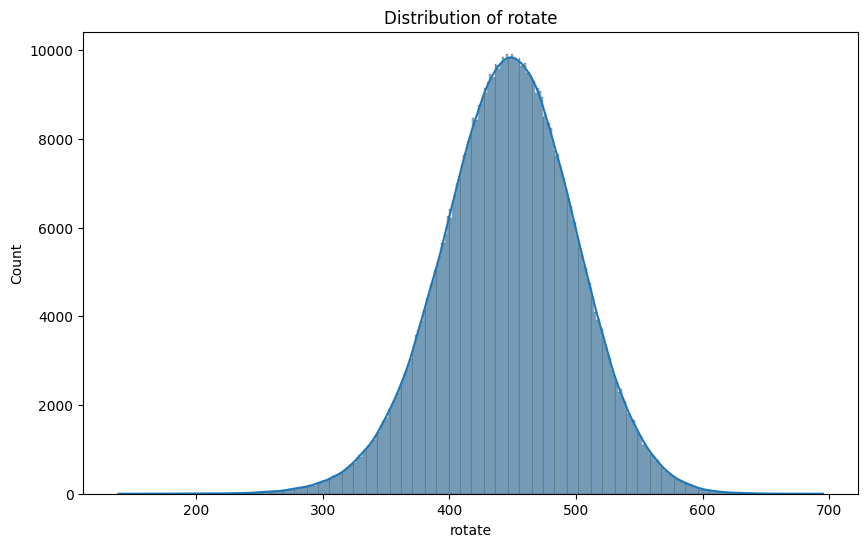

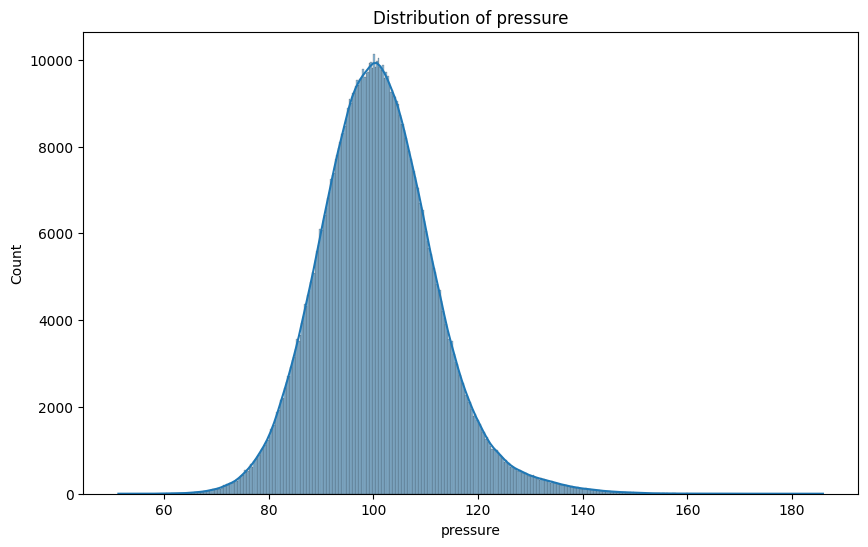

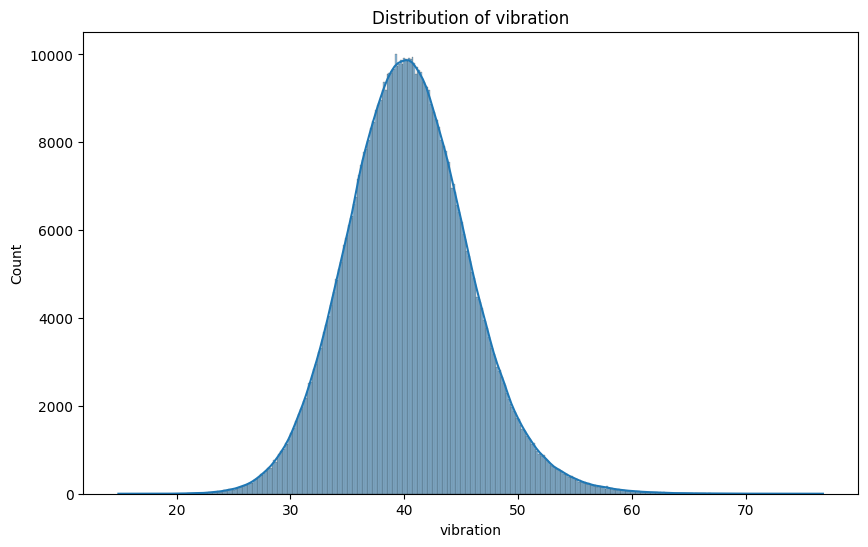

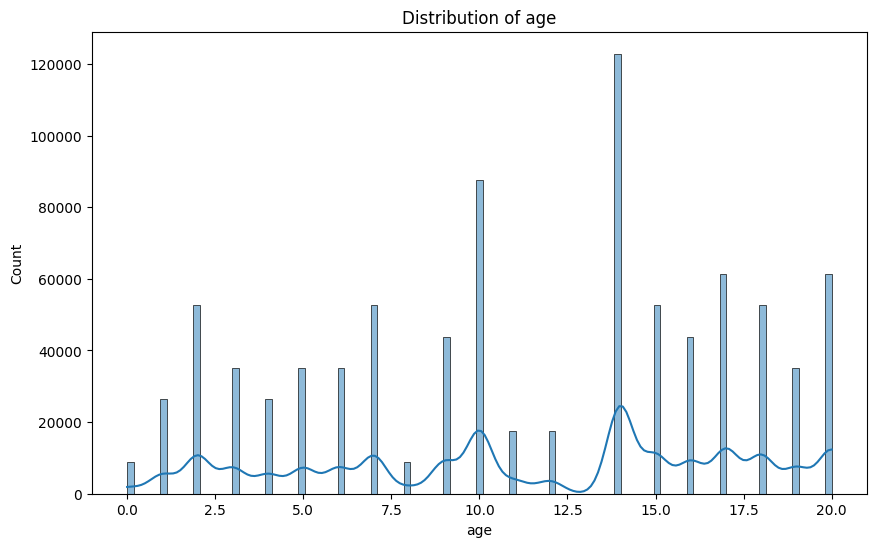

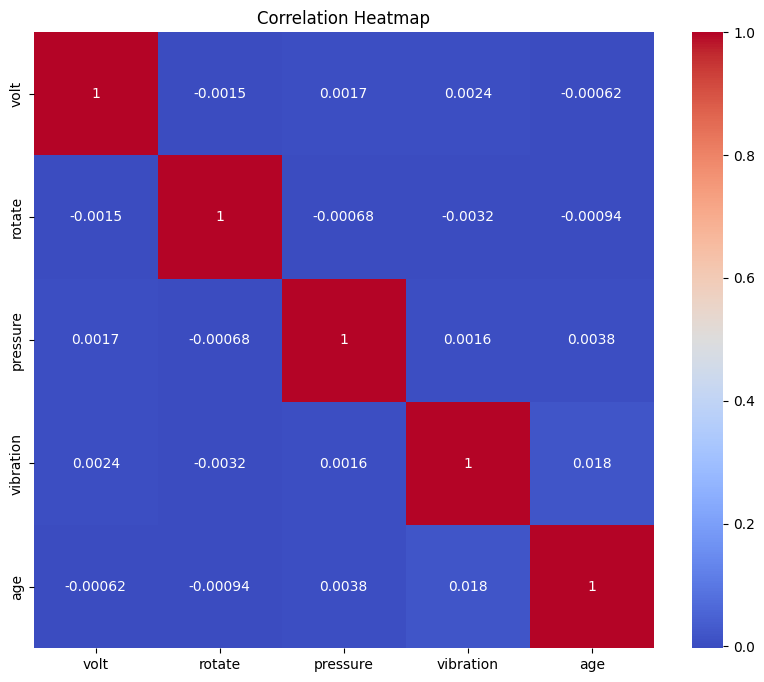

                            datetime      machineID           volt  \
count                         877209  877209.000000  877209.000000   
mean   2015-07-02 18:03:56.390187008      50.498446     170.780942   
min              2015-01-01 06:00:00       1.000000      97.333604   
25%              2015-04-02 12:00:00      25.000000     160.305918   
50%              2015-07-02 18:00:00      50.000000     170.609301   
75%              2015-10-02 00:00:00      75.000000     181.008303   
max              2016-01-01 06:00:00     100.000000     255.124717   
std                              NaN      28.866697      15.511268   

              rotate       pressure      vibration            age  
count  877209.000000  877209.000000  877209.000000  877209.000000  
mean      446.570735     100.861433      40.386459      11.330280  
min       138.432075      51.237106      14.877054       0.000000  
25%       412.265479      93.499116      36.777911       7.000000  
50%       447.537538     100.

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# File paths
file_paths = {
    'errors': '/Users/ian/Downloads/TechnicalAssessment_DataSet_Data Scientist24005135/data/PdM_errors.csv',
    'failures': '/Users/ian/Downloads/TechnicalAssessment_DataSet_Data Scientist24005135/data/PdM_failures.csv',
    'machines': '/Users/ian/Downloads/TechnicalAssessment_DataSet_Data Scientist24005135/data/PdM_machines.csv',
    'maint': '/Users/ian/Downloads/TechnicalAssessment_DataSet_Data Scientist24005135/data/PdM_maint.csv',
    'telemetry': '/Users/ian/Downloads/TechnicalAssessment_DataSet_Data Scientist24005135/data/PdM_telemetry.csv'
}

# 1. Merge datasets
def load_and_merge_data(file_paths):
    dfs = {}
    for key, path in file_paths.items():
        dfs[key] = pd.read_csv(path)
        if 'datetime' in dfs[key].columns:
            dfs[key]['datetime'] = pd.to_datetime(dfs[key]['datetime'])
    
    # Merge all dataframes on 'machineID' and 'datetime' where applicable
    merged_df = dfs['telemetry'].merge(dfs['machines'], on='machineID', how='left')
    for key in ['errors', 'failures', 'maint']:
        merged_df = merged_df.merge(dfs[key], on=['machineID', 'datetime'], how='left')
    
    return merged_df, dfs

merged_df, individual_dfs = load_and_merge_data(file_paths)

# 2. Perform comprehensive data quality checks

# a. Missing values analysis
def missing_values_analysis(df):
    missing = df.isnull().sum()
    missing_percent = 100 * df.isnull().sum() / len(df)
    missing_table = pd.concat([missing, missing_percent], axis=1, keys=['Missing Values', '% Missing'])
    print(missing_table[missing_table['Missing Values'] > 0].sort_values('% Missing', ascending=False))

    plt.figure(figsize=(10, 6))
    sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
    plt.title('Missing Value Heatmap')
    plt.tight_layout()
    plt.show()

missing_values_analysis(merged_df)

# b. Outlier detection using Z-score and IQR
def detect_outliers(df, columns):
    for col in columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - (1.5 * iqr)
        upper_bound = q3 + (1.5 * iqr)
        
        outliers_iqr = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        
        z_scores = np.abs(stats.zscore(df[col]))
        outliers_z = df[z_scores > 3]
        
        print(f"Outliers in {col}:")
        print(f"IQR method: {len(outliers_iqr)} outliers")
        print(f"Z-score method: {len(outliers_z)} outliers")
        
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=df[col])
        plt.title(f'Box Plot of {col}')
        plt.show()

detect_outliers(merged_df, ['volt', 'rotate', 'pressure', 'vibration'])

# c. Consistency checks across related variables
def consistency_check(df):
    # Check if all machines in telemetry data are present in machines data
    telemetry_machines = set(df['machineID'].unique())
    metadata_machines = set(individual_dfs['machines']['machineID'].unique())
    missing_machines = telemetry_machines - metadata_machines
    if missing_machines:
        print(f"Machines in telemetry data but not in metadata: {missing_machines}")
    
    # Check if all dates in telemetry data are within the expected range
    min_date = df['datetime'].min()
    max_date = df['datetime'].max()
    expected_min = pd.Timestamp('2015-01-01')
    expected_max = pd.Timestamp('2015-12-31')
    if min_date < expected_min or max_date > expected_max:
        print(f"Date range inconsistency: Expected {expected_min} to {expected_max}, got {min_date} to {max_date}")
    
    # Check for any negative values in sensor readings
    for col in ['volt', 'rotate', 'pressure', 'vibration']:
        if (df[col] < 0).any():
            print(f"Negative values found in {col}")

consistency_check(merged_df)

# Additional visualization for data distribution
def plot_distributions(df, columns):
    for col in columns:
        plt.figure(figsize=(10, 6))
        sns.histplot(df[col], kde=True)
        plt.title(f'Distribution of {col}')
        plt.show()

plot_distributions(merged_df, ['volt', 'rotate', 'pressure', 'vibration', 'age'])

# Correlation analysis
def correlation_analysis(df):
    corr = df[['volt', 'rotate', 'pressure', 'vibration', 'age']].corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=True, cmap='coolwarm')
    plt.title('Correlation Heatmap')
    plt.show()

correlation_analysis(merged_df)

# Summary statistics
print(merged_df.describe())

# Save the merged and cleaned dataset
merged_df.to_csv('merged_cleaned_data.csv', index=False)

___

In [2]:
%pip install plotly scipy pathlib matplotlib

  Using cached plotly-5.22.0-py3-none-any.whl.metadata (7.1 kB)
Using cached plotly-5.22.0-py3-none-any.whl (16.4 MB)
Note: you may need to restart the kernel to use updated packages.


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from pathlib import Path
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Set style for matplotlib and define file paths
plt.style.use('fivethirtyeight')
base_path = Path(
    '/Users/ian/Downloads/TechnicalAssessment_DataSet_Data Scientist24005135/data')

file_paths = {
    'errors': base_path / 'PdM_errors.csv',
    'failures': base_path / 'PdM_failures.csv',
    'machines': base_path / 'PdM_machines.csv',
    'maint': base_path / 'PdM_maint.csv',
    'telemetry': base_path / 'PdM_telemetry.csv'
}

# Define missing_values_analysis function


def missing_values_analysis(df):
    missing = df.isnull().sum()
    percent_missing = missing / len(df) * 100
    missing_df = pd.DataFrame(
        {'Missing Values': missing, '% Missing': percent_missing})
    return missing_df

# Load and merge data


def load_and_merge_data(paths):
    dfs = {}
    for name, path in paths.items():
        dfs[name] = pd.read_csv(path)
        if 'datetime' not in dfs[name].columns:
            raise KeyError(
                f"The required column 'datetime' is missing in {name}.csv")
        dfs[name]['datetime'] = pd.to_datetime(dfs[name]['datetime'])

    telemetry_df = dfs['telemetry']
    for key in ['machines', 'errors', 'failures', 'maint']:
        if 'datetime' in dfs[key].columns:
            telemetry_df = telemetry_df.merge(
                dfs[key], on=['machineID', 'datetime'], how='left')
        else:
            print(f"Skipping merge for {
                  key} due to missing 'datetime' column.")
    return telemetry_df, dfs


# Now you can try loading your data again
try:
    merged_df, individual_dfs = load_and_merge_data(file_paths)
    print("Data loaded and merged successfully.")
except KeyError as e:
    print(f"Error in data loading: {e}")

def detect_outliers(df, columns):
    outlier_info = {}
    for col in columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - (1.5 * iqr)
        upper_bound = q3 + (1.5 * iqr)

        outliers_iqr = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

        z_scores = np.abs(stats.zscore(df[col]))
        outliers_z = df[z_scores > 3]

        outlier_info[col] = {
            'IQR': len(outliers_iqr),
            'Z-score': len(outliers_z)
        }

        fig = go.Figure()
        fig.add_trace(go.Box(y=df[col], name=col))
        fig.add_trace(go.Scatter(x=[col]*len(outliers_iqr), y=outliers_iqr[col], mode='markers',
                                 name='IQR Outliers', marker=dict(color='red', size=8, symbol='x')))
        fig.update_layout(title=f'Box Plot and Outliers for {
                          col}', showlegend=True)
        fig.show()

    return pd.DataFrame(outlier_info).T


%pip install nbformat>=4.2.0
outlier_summary = detect_outliers(
    merged_df, ['volt', 'rotate', 'pressure', 'vibration'])
print(outlier_summary)


def consistency_check(df, individual_dfs):
    issues = []

    # Check if all machines in telemetry data are present in machines data
    telemetry_machines = set(df['machineID'].unique())
    metadata_machines = set(individual_dfs['machines']['machineID'].unique())
    missing_machines = telemetry_machines - metadata_machines
    if missing_machines:
        issues.append(f"Machines in telemetry data but not in metadata: {
                      missing_machines}")

    # Check if all dates in telemetry data are within the expected range
    min_date = df['datetime'].min()
    max_date = df['datetime'].max()
    expected_min = pd.Timestamp('2015-01-01')
    expected_max = pd.Timestamp('2015-12-31')
    if min_date < expected_min or max_date > expected_max:
        issues.append(f"Date range inconsistency: Expected {expected_min} to {
                      expected_max}, got {min_date} to {max_date}")

    # Check for any negative values in sensor readings
    for col in ['volt', 'rotate', 'pressure', 'vibration']:
        neg_values = df[df[col] < 0]
        if not neg_values.empty:
            issues.append(f"Negative values found in {
                          col}: {len(neg_values)} instances")

    return issues


consistency_issues = consistency_check(merged_df, individual_dfs)
for issue in consistency_issues:
    print(issue)


def plot_distributions(df, columns):
    fig = make_subplots(rows=len(columns), cols=1, subplot_titles=columns)

    for i, col in enumerate(columns, 1):
        fig.add_trace(go.Histogram(x=df[col], name=col), row=i, col=1)
        fig.add_trace(go.Scatter(x=df[col], y=df[col].value_counts().sort_index() / len(df),
                                 mode='lines', name=f'{col} KDE'), row=i, col=1)

    fig.update_layout(height=300*len(columns),
                      title_text="Distribution of Variables")
    fig.show()


plot_distributions(merged_df, ['volt', 'rotate',
                   'pressure', 'vibration', 'age'])


def correlation_analysis(df):
    corr = df[['volt', 'rotate', 'pressure', 'vibration', 'age']].corr()

    fig = px.imshow(corr,
                    labels=dict(color="Correlation"),
                    x=corr.columns,
                    y=corr.columns,
                    color_continuous_scale='RdBu_r',
                    zmin=-1, zmax=1)

    fig.update_layout(title='Correlation Heatmap', width=700, height=700)
    fig.show()

    return corr


correlation_matrix = correlation_analysis(merged_df)
print(correlation_matrix)

# Summary statistics
summary_stats = merged_df.describe()
print(summary_stats)

# Save the merged and cleaned dataset
output_path = base_path / 'merged_cleaned_data.csv'
merged_df.to_csv(output_path, index=False)
print(f"Merged and cleaned data saved to: {output_path}")

# Final data quality report
print("\nData Quality Report:")
print(f"Total number of rows: {len(merged_df)}")
print(f"Total number of columns: {len(merged_df.columns)}")
print(f"Number of machines: {merged_df['machineID'].nunique()}")
print(f"Date range: {merged_df['datetime'].min()} to {
      merged_df['datetime'].max()}")
print(f"\nMissing values summary:\n{missing_table}")
print(f"\nOutlier summary:\n{outlier_summary}")
print("\nConsistency issues:")
for issue in consistency_issues:
    print(f"- {issue}")

In [15]:
%pip install nbformat

  Using cached nbformat-5.10.4-py3-none-any.whl.metadata (3.6 kB)
  Using cached fastjsonschema-2.20.0-py3-none-any.whl.metadata (2.1 kB)
  Using cached jsonschema-4.22.0-py3-none-any.whl.metadata (8.2 kB)
  Using cached attrs-23.2.0-py3-none-any.whl.metadata (9.5 kB)
  Using cached jsonschema_specifications-2023.12.1-py3-none-any.whl.metadata (3.0 kB)
  Using cached referencing-0.35.1-py3-none-any.whl.metadata (2.8 kB)
  Using cached rpds_py-0.18.1-cp312-cp312-macosx_10_12_x86_64.whl.metadata (4.1 kB)
Using cached nbformat-5.10.4-py3-none-any.whl (78 kB)
Using cached fastjsonschema-2.20.0-py3-none-any.whl (23 kB)
Using cached jsonschema-4.22.0-py3-none-any.whl (88 kB)
Using cached attrs-23.2.0-py3-none-any.whl (60 kB)
Using cached jsonschema_specifications-2023.12.1-py3-none-any.whl (18 kB)
Using cached referencing-0.35.1-py3-none-any.whl (26 kB)
Using cached rpds_py-0.18.1-cp312-cp312-macosx_10_12_x86_64.whl (329 kB)
Note: you may need to restart the kernel to use updated packages.


Plotly visualization failed: Mime type rendering requires nbformat>=4.2.0 but it is not installed
Falling back to matplotlib for visualization.


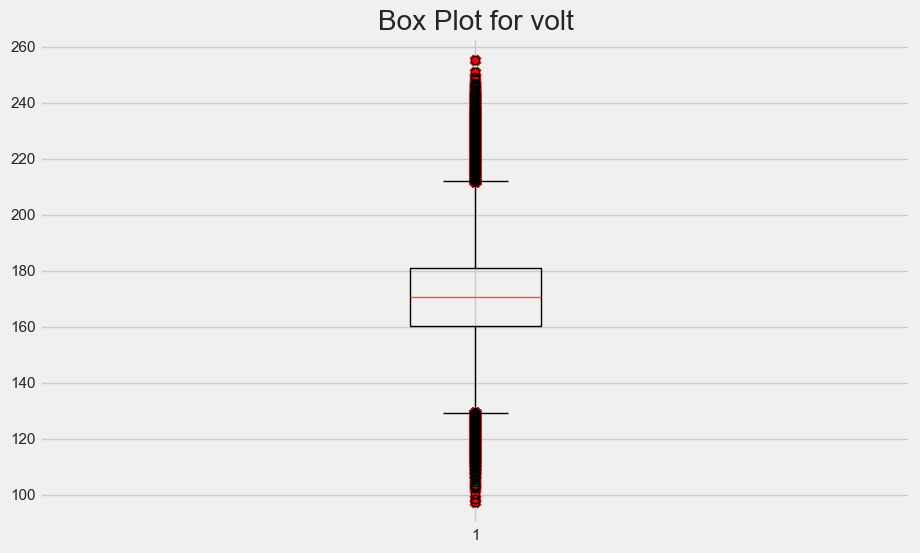

Plotly visualization failed: Mime type rendering requires nbformat>=4.2.0 but it is not installed
Falling back to matplotlib for visualization.


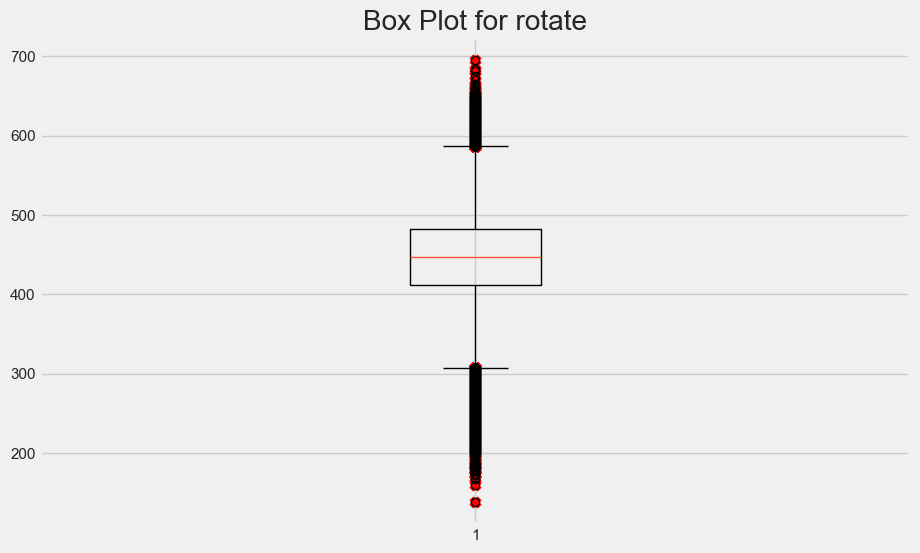

Plotly visualization failed: Mime type rendering requires nbformat>=4.2.0 but it is not installed
Falling back to matplotlib for visualization.


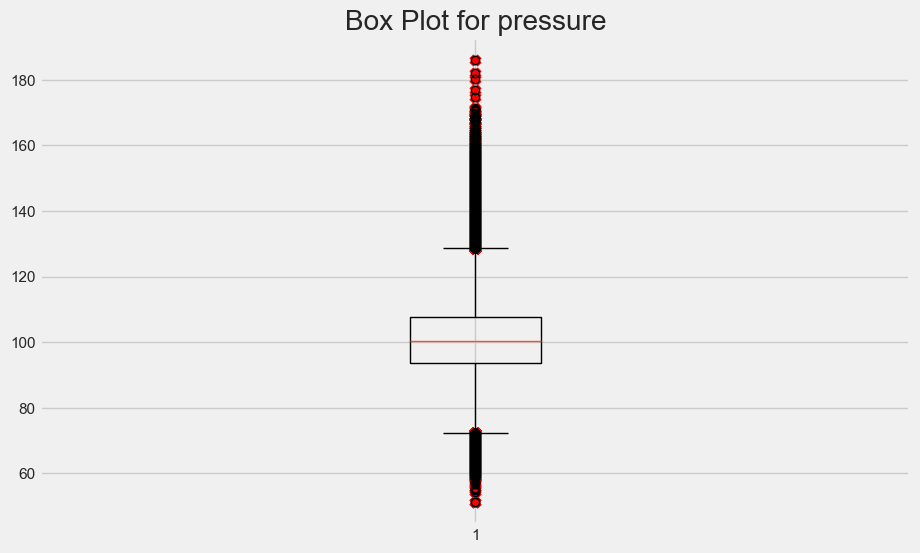

Plotly visualization failed: Mime type rendering requires nbformat>=4.2.0 but it is not installed
Falling back to matplotlib for visualization.


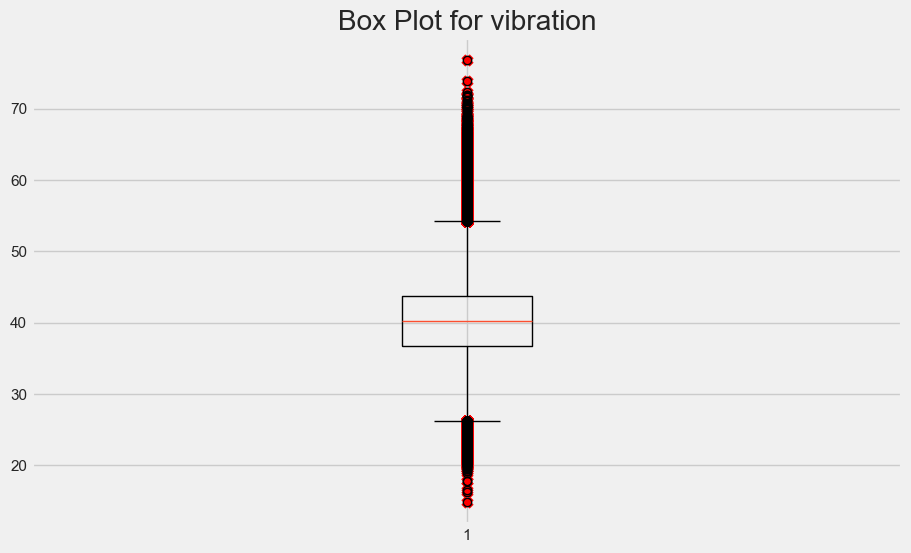

             IQR  Z-score
volt        7480     3049
rotate      8595     3506
pressure   15634     6886
vibration  11146     4746


In [18]:
import matplotlib.pyplot as plt


def detect_outliers(df, columns):
    outlier_info = {}
    for col in columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - (1.5 * iqr)
        upper_bound = q3 + (1.5 * iqr)

        outliers_iqr = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

        z_scores = np.abs(stats.zscore(df[col]))
        outliers_z = df[z_scores > 3]

        outlier_info[col] = {
            'IQR': len(outliers_iqr),
            'Z-score': len(outliers_z)
        }

        try:
            fig = go.Figure()
            fig.add_trace(go.Box(y=df[col], name=col))
            fig.add_trace(go.Scatter(x=[col]*len(outliers_iqr), y=outliers_iqr[col], mode='markers',
                                     name='IQR Outliers', marker=dict(color='red', size=8, symbol='x')))
            fig.update_layout(title=f'Box Plot and Outliers for {
                              col}', showlegend=True)
            fig.show()
        except Exception as e:
            print(f"Plotly visualization failed: {e}")
            print("Falling back to matplotlib for visualization.")

            plt.figure(figsize=(10, 6))
            plt.boxplot(df[col])
            plt.title(f'Box Plot for {col}')
            plt.scatter([1] * len(outliers_iqr),
                        outliers_iqr[col], color='red', marker='x')
            plt.show()

    return pd.DataFrame(outlier_info).T


# Now you can call the function without the %pip install line
outlier_summary = detect_outliers(
    merged_df, ['volt', 'rotate', 'pressure', 'vibration'])
print(outlier_summary)

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from pathlib import Path
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Install required packages
import sys
!{sys.executable} -m pip install nbformat>=4.2.0

# Set style for matplotlib and define file paths
plt.style.use('fivethirtyeight')
base_path = Path('/Users/ian/Downloads/TechnicalAssessment_DataSet_Data Scientist24005135/data')

file_paths = {
    'errors': base_path / 'PdM_errors.csv',
    'failures': base_path / 'PdM_failures.csv',
    'machines': base_path / 'PdM_machines.csv',
    'maint': base_path / 'PdM_maint.csv',
    'telemetry': base_path / 'PdM_telemetry.csv'
}

def load_and_merge_data(paths):
    dfs = {}
    for name, path in paths.items():
        dfs[name] = pd.read_csv(path)
        if 'datetime' in dfs[name].columns:
            dfs[name]['datetime'] = pd.to_datetime(dfs[name]['datetime'])

    telemetry_df = dfs['telemetry']
    for key in ['machines', 'errors', 'failures', 'maint']:
        if key == 'machines':
            telemetry_df = telemetry_df.merge(dfs[key], on='machineID', how='left')
        elif 'datetime' in dfs[key].columns:
            telemetry_df = telemetry_df.merge(dfs[key], on=['machineID', 'datetime'], how='left')
        else:
            print(f"Skipping merge for {key} due to missing 'datetime' column.")
    return telemetry_df, dfs

def missing_values_analysis(df):
    missing = df.isnull().sum()
    percent_missing = missing / len(df) * 100
    missing_df = pd.DataFrame({'Missing Values': missing, '% Missing': percent_missing})
    missing_df = missing_df[missing_df['Missing Values'] > 0].sort_values('% Missing', ascending=False)
    
    fig = px.bar(missing_df, x=missing_df.index, y='% Missing', 
                 title='Percentage of Missing Values by Column')
    fig.show()
    
    return missing_df

def detect_outliers(df, columns):
    outlier_info = {}
    for col in columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - (1.5 * iqr)
        upper_bound = q3 + (1.5 * iqr)
        
        outliers_iqr = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        z_scores = np.abs(stats.zscore(df[col]))
        outliers_z = df[z_scores > 3]
        
        outlier_info[col] = {
            'IQR': len(outliers_iqr),
            'Z-score': len(outliers_z)
        }
        
        fig = go.Figure()
        fig.add_trace(go.Box(y=df[col], name=col))
        fig.add_trace(go.Scatter(x=[col]*len(outliers_iqr), y=outliers_iqr[col], mode='markers',
                                 name='IQR Outliers', marker=dict(color='red', size=8, symbol='x')))
        fig.update_layout(title=f'Box Plot and Outliers for {col}', showlegend=True)
        fig.show()
    
    return pd.DataFrame(outlier_info).T

def consistency_check(df, individual_dfs):
    issues = []
    
    telemetry_machines = set(df['machineID'].unique())
    metadata_machines = set(individual_dfs['machines']['machineID'].unique())
    missing_machines = telemetry_machines - metadata_machines
    if missing_machines:
        issues.append(f"Machines in telemetry data but not in metadata: {missing_machines}")
    
    min_date = df['datetime'].min()
    max_date = df['datetime'].max()
    expected_min = pd.Timestamp('2015-01-01')
    expected_max = pd.Timestamp('2015-12-31')
    if min_date < expected_min or max_date > expected_max:
        issues.append(f"Date range inconsistency: Expected {expected_min} to {expected_max}, got {min_date} to {max_date}")
    
    for col in ['volt', 'rotate', 'pressure', 'vibration']:
        neg_values = df[df[col] < 0]
        if not neg_values.empty:
            issues.append(f"Negative values found in {col}: {len(neg_values)} instances")
    
    return issues

def plot_distributions(df, columns):
    for col in columns:
        fig = px.histogram(df, x=col, marginal='box', title=f'Distribution of {col}')
        fig.show()

def correlation_analysis(df):
    corr = df[['volt', 'rotate', 'pressure', 'vibration', 'age']].corr()
    
    fig = px.imshow(corr, 
                    labels=dict(color="Correlation"),
                    x=corr.columns,
                    y=corr.columns,
                    color_continuous_scale='RdBu_r',
                    zmin=-1, zmax=1)
    
    fig.update_layout(title='Correlation Heatmap', width=700, height=700)
    fig.show()
    
    return corr

# Main execution
try:
    merged_df, individual_dfs = load_and_merge_data(file_paths)
    print("Data loaded and merged successfully.")
    
    missing_table = missing_values_analysis(merged_df)
    print("Missing values analysis completed.")
    
    outlier_summary = detect_outliers(merged_df, ['volt', 'rotate', 'pressure', 'vibration'])
    print("Outlier detection completed.")
    
    consistency_issues = consistency_check(merged_df, individual_dfs)
    print("Consistency check completed.")
    
    plot_distributions(merged_df, ['volt', 'rotate', 'pressure', 'vibration', 'age'])
    print("Distribution plots generated.")
    
    correlation_matrix = correlation_analysis(merged_df)
    print("Correlation analysis completed.")
    
    # Summary statistics
    summary_stats = merged_df.describe()
    print("\nSummary Statistics:")
    print(summary_stats)
    
    # Save the merged and cleaned dataset
    output_path = base_path / 'merged_cleaned_data.csv'
    merged_df.to_csv(output_path, index=False)
    print(f"\nMerged and cleaned data saved to: {output_path}")
    
    # Final data quality report
    print("\nData Quality Report:")
    print(f"Total number of rows: {len(merged_df)}")
    print(f"Total number of columns: {len(merged_df.columns)}")
    print(f"Number of machines: {merged_df['machineID'].nunique()}")
    print(f"Date range: {merged_df['datetime'].min()} to {merged_df['datetime'].max()}")
    print(f"\nMissing values summary:\n{missing_table}")
    print(f"\nOutlier summary:\n{outlier_summary}")
    print("\nConsistency issues:")
    for issue in consistency_issues:
        print(f"- {issue}")

except Exception as e:
    print(f"An error occurred: {str(e)}")

zsh:1: 4.2.0 not found
Data loaded and merged successfully.
An error occurred: Mime type rendering requires nbformat>=4.2.0 but it is not installed


Data loaded and merged successfully.


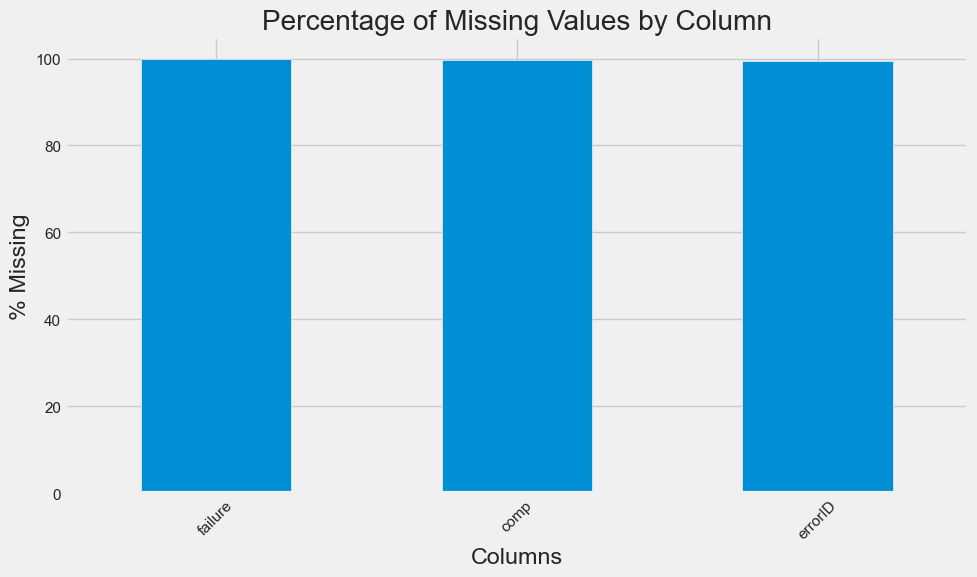

Missing values analysis completed.


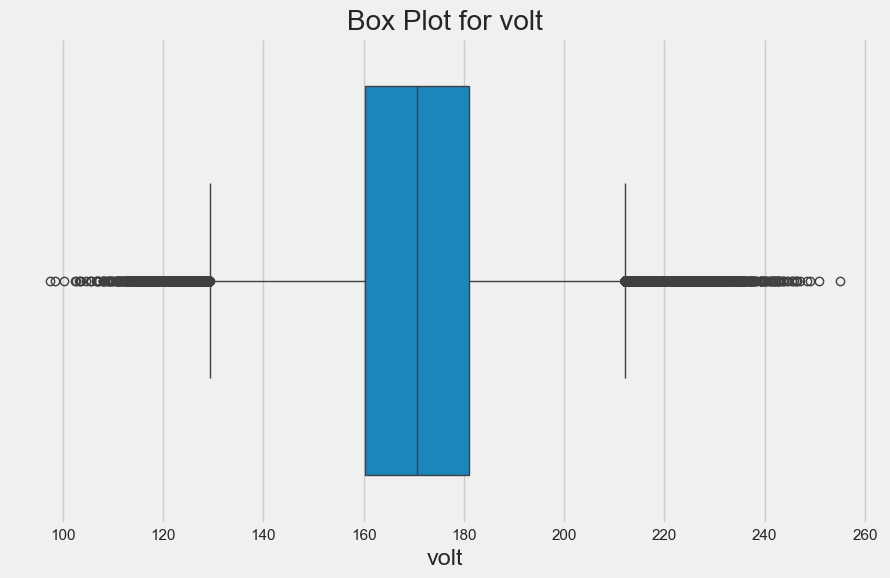

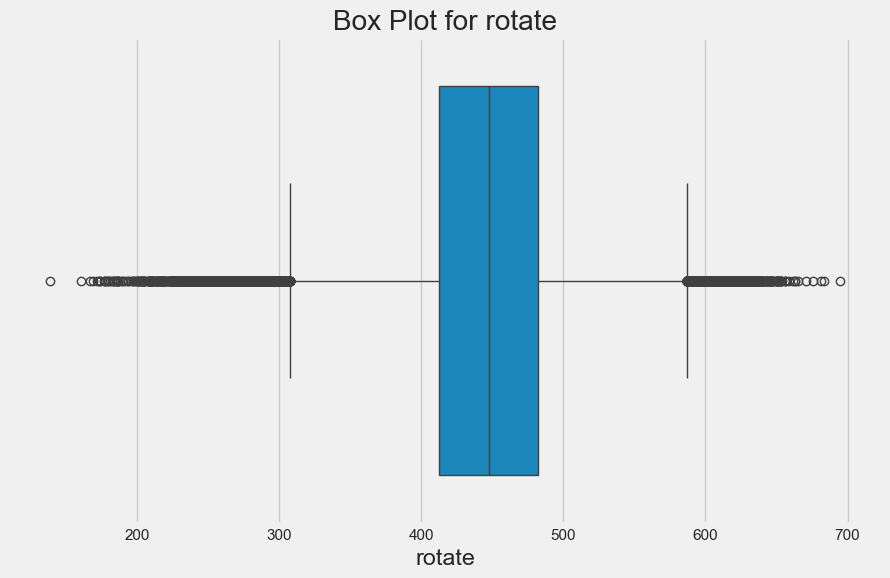

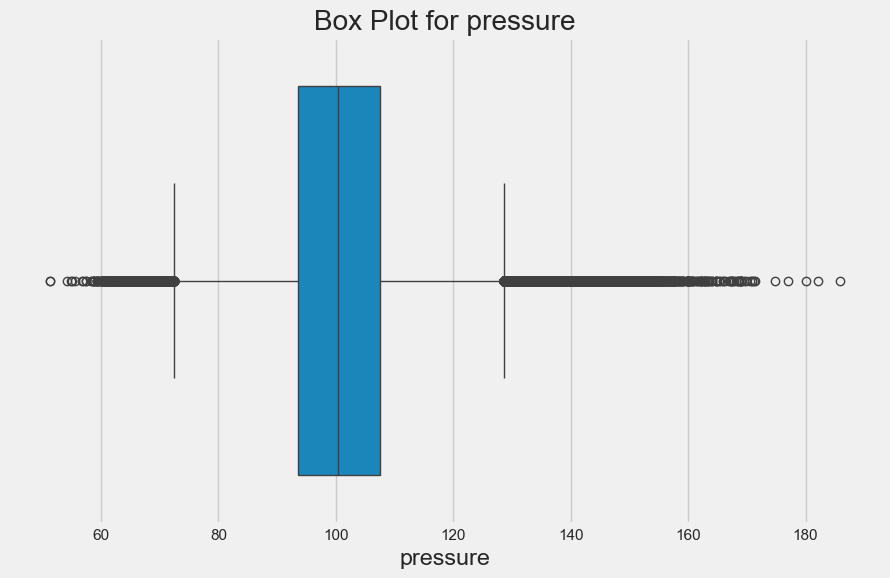

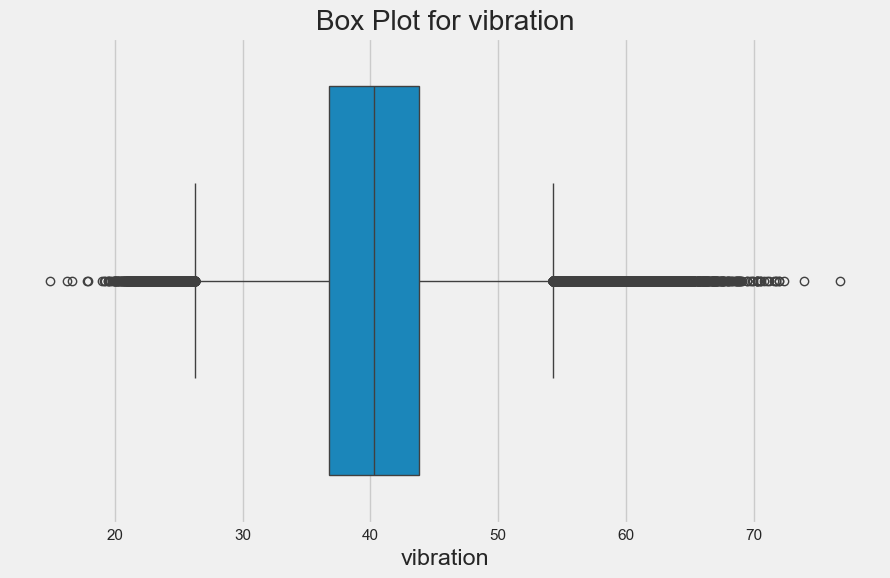

Outlier detection completed.
Consistency check completed.


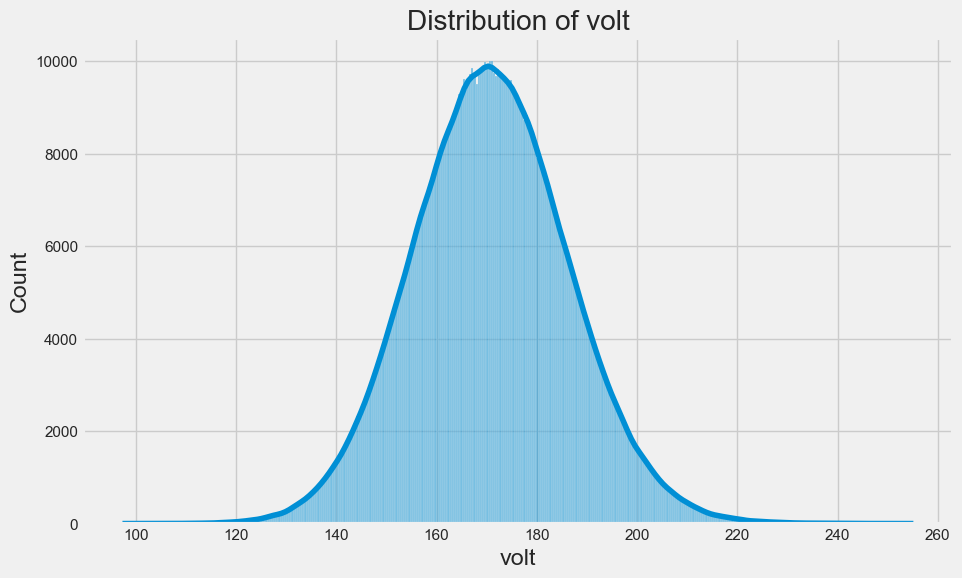

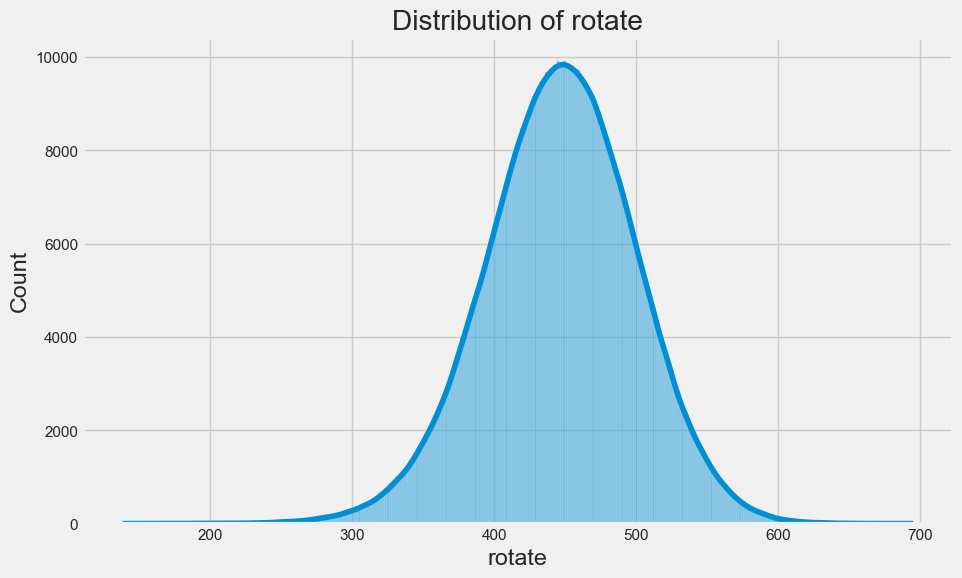

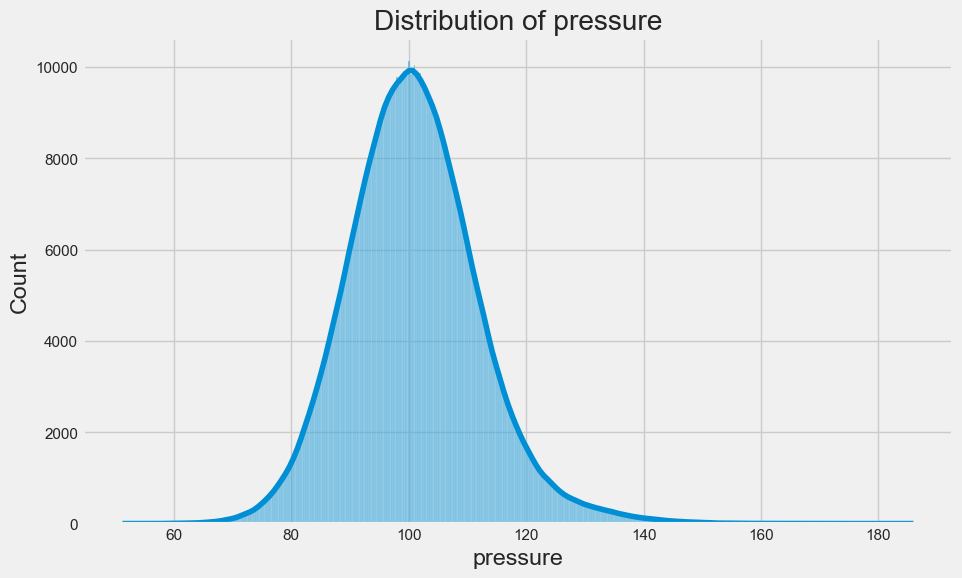

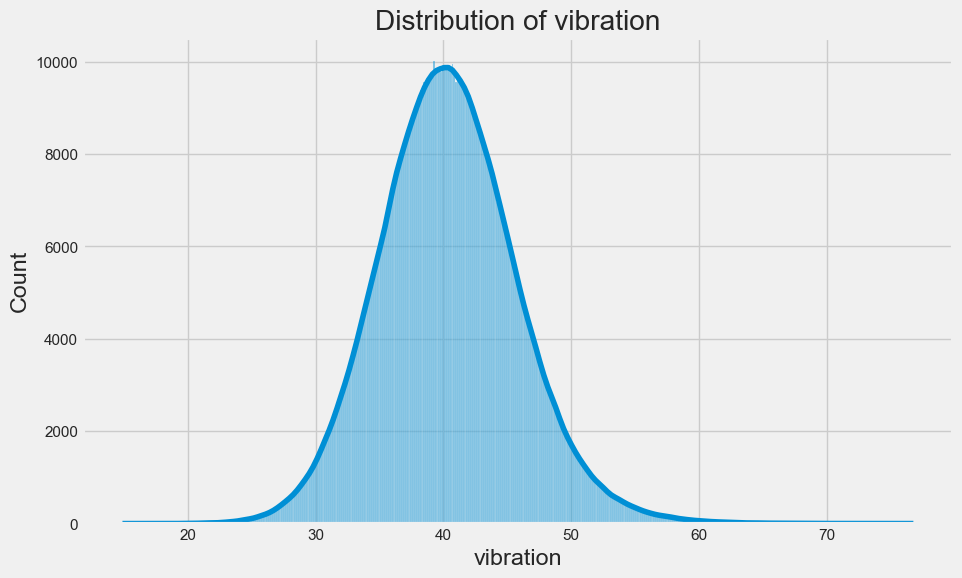

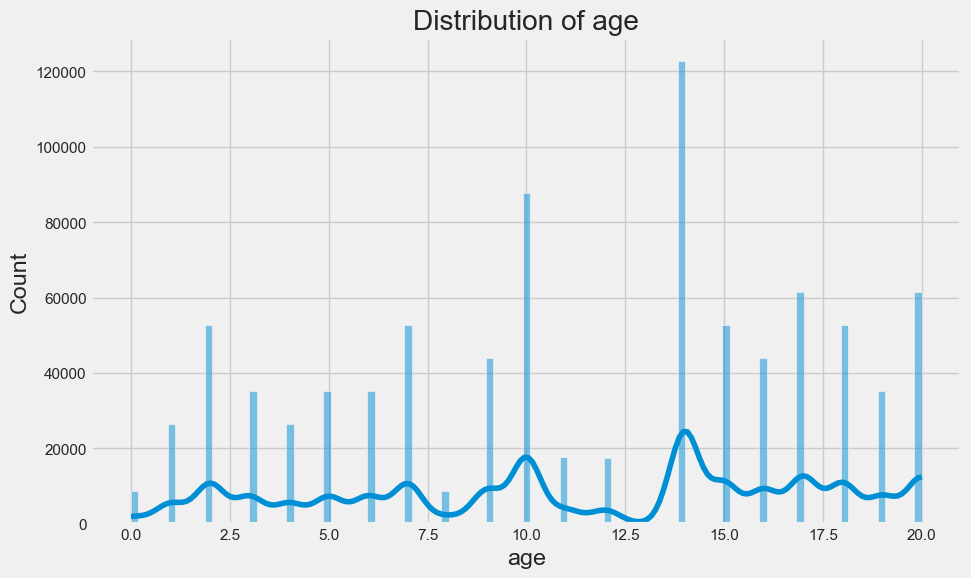

Distribution plots generated.


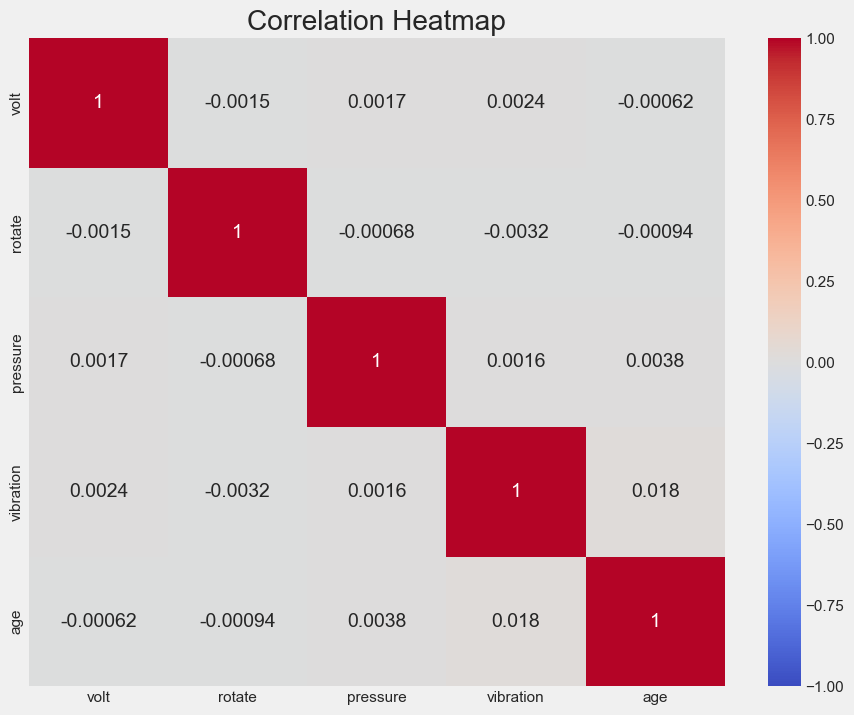

Correlation analysis completed.

Summary Statistics:
                            datetime      machineID           volt  \
count                         877209  877209.000000  877209.000000   
mean   2015-07-02 18:03:56.390187008      50.498446     170.780942   
min              2015-01-01 06:00:00       1.000000      97.333604   
25%              2015-04-02 12:00:00      25.000000     160.305918   
50%              2015-07-02 18:00:00      50.000000     170.609301   
75%              2015-10-02 00:00:00      75.000000     181.008303   
max              2016-01-01 06:00:00     100.000000     255.124717   
std                              NaN      28.866697      15.511268   

              rotate       pressure      vibration            age  
count  877209.000000  877209.000000  877209.000000  877209.000000  
mean      446.570735     100.861433      40.386459      11.330280  
min       138.432075      51.237106      14.877054       0.000000  
25%       412.265479      93.499116      36.

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from pathlib import Path

# Set style for matplotlib and define file paths
plt.style.use('fivethirtyeight')
base_path = Path('/Users/ian/Downloads/TechnicalAssessment_DataSet_Data Scientist24005135/data')

file_paths = {
    'errors': base_path / 'PdM_errors.csv',
    'failures': base_path / 'PdM_failures.csv',
    'machines': base_path / 'PdM_machines.csv',
    'maint': base_path / 'PdM_maint.csv',
    'telemetry': base_path / 'PdM_telemetry.csv'
}

def load_and_merge_data(paths):
    dfs = {}
    for name, path in paths.items():
        dfs[name] = pd.read_csv(path)
        if 'datetime' in dfs[name].columns:
            dfs[name]['datetime'] = pd.to_datetime(dfs[name]['datetime'])

    telemetry_df = dfs['telemetry']
    for key in ['machines', 'errors', 'failures', 'maint']:
        if key == 'machines':
            telemetry_df = telemetry_df.merge(dfs[key], on='machineID', how='left')
        elif 'datetime' in dfs[key].columns:
            telemetry_df = telemetry_df.merge(dfs[key], on=['machineID', 'datetime'], how='left')
        else:
            print(f"Skipping merge for {key} due to missing 'datetime' column.")
    return telemetry_df, dfs

def missing_values_analysis(df):
    missing = df.isnull().sum()
    percent_missing = missing / len(df) * 100
    missing_df = pd.DataFrame({'Missing Values': missing, '% Missing': percent_missing})
    missing_df = missing_df[missing_df['Missing Values'] > 0].sort_values('% Missing', ascending=False)
    
    plt.figure(figsize=(10, 6))
    missing_df['% Missing'].plot(kind='bar')
    plt.title('Percentage of Missing Values by Column')
    plt.ylabel('% Missing')
    plt.xlabel('Columns')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    return missing_df

def detect_outliers(df, columns):
    outlier_info = {}
    for col in columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - (1.5 * iqr)
        upper_bound = q3 + (1.5 * iqr)
        
        outliers_iqr = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        z_scores = np.abs(stats.zscore(df[col]))
        outliers_z = df[z_scores > 3]
        
        outlier_info[col] = {
            'IQR': len(outliers_iqr),
            'Z-score': len(outliers_z)
        }
        
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=df[col])
        plt.title(f'Box Plot for {col}')
        plt.show()
    
    return pd.DataFrame(outlier_info).T

def consistency_check(df, individual_dfs):
    issues = []
    
    telemetry_machines = set(df['machineID'].unique())
    metadata_machines = set(individual_dfs['machines']['machineID'].unique())
    missing_machines = telemetry_machines - metadata_machines
    if missing_machines:
        issues.append(f"Machines in telemetry data but not in metadata: {missing_machines}")
    
    min_date = df['datetime'].min()
    max_date = df['datetime'].max()
    expected_min = pd.Timestamp('2015-01-01')
    expected_max = pd.Timestamp('2015-12-31')
    if min_date < expected_min or max_date > expected_max:
        issues.append(f"Date range inconsistency: Expected {expected_min} to {expected_max}, got {min_date} to {max_date}")
    
    for col in ['volt', 'rotate', 'pressure', 'vibration']:
        neg_values = df[df[col] < 0]
        if not neg_values.empty:
            issues.append(f"Negative values found in {col}: {len(neg_values)} instances")
    
    return issues

def plot_distributions(df, columns):
    for col in columns:
        plt.figure(figsize=(10, 6))
        sns.histplot(df[col], kde=True)
        plt.title(f'Distribution of {col}')
        plt.show()

def correlation_analysis(df):
    corr = df[['volt', 'rotate', 'pressure', 'vibration', 'age']].corr()
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Correlation Heatmap')
    plt.show()
    
    return corr

# Main execution
try:
    merged_df, individual_dfs = load_and_merge_data(file_paths)
    print("Data loaded and merged successfully.")
    
    missing_table = missing_values_analysis(merged_df)
    print("Missing values analysis completed.")
    
    outlier_summary = detect_outliers(merged_df, ['volt', 'rotate', 'pressure', 'vibration'])
    print("Outlier detection completed.")
    
    consistency_issues = consistency_check(merged_df, individual_dfs)
    print("Consistency check completed.")
    
    plot_distributions(merged_df, ['volt', 'rotate', 'pressure', 'vibration', 'age'])
    print("Distribution plots generated.")
    
    correlation_matrix = correlation_analysis(merged_df)
    print("Correlation analysis completed.")
    
    # Summary statistics
    summary_stats = merged_df.describe()
    print("\nSummary Statistics:")
    print(summary_stats)
    
    # Save the merged and cleaned dataset
    output_path = base_path / 'merged_cleaned_data.csv'
    merged_df.to_csv(output_path, index=False)
    print(f"\nMerged and cleaned data saved to: {output_path}")
    
    # Final data quality report
    print("\nData Quality Report:")
    print(f"Total number of rows: {len(merged_df)}")
    print(f"Total number of columns: {len(merged_df.columns)}")
    print(f"Number of machines: {merged_df['machineID'].nunique()}")
    print(f"Date range: {merged_df['datetime'].min()} to {merged_df['datetime'].max()}")
    print(f"\nMissing values summary:\n{missing_table}")
    print(f"\nOutlier summary:\n{outlier_summary}")
    print("\nConsistency issues:")
    for issue in consistency_issues:
        print(f"- {issue}")

except Exception as e:
    print(f"An error occurred: {str(e)}")

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set()

# Print the available styles
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


Starting hypothesis testing and advanced analyses...
Hypothesis Test: Machine Age vs Failure Occurrence
Chi-square statistic: 74.75378745709986
p-value: 5.332337931636517e-18


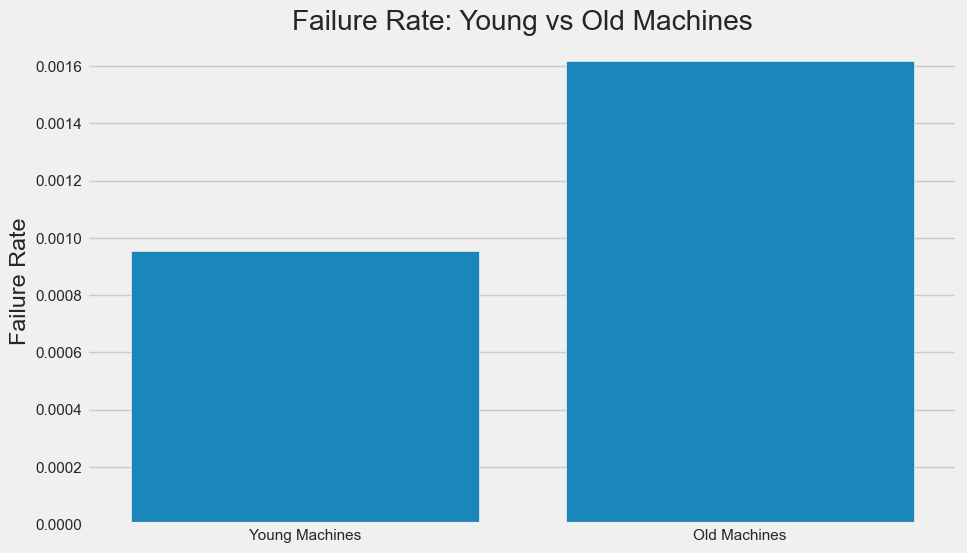

Age vs Failures hypothesis test completed.

ANOVA Test for volt across machine models:
F-statistic: 0.9609507663545157
p-value: 0.4100424194754445

Tukey's HSD Test Results:
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
model1 model2  -0.0595 0.7311 -0.2077 0.0887  False
model1 model3   0.0224 0.9699  -0.106 0.1508  False
model1 model4  -0.0131 0.9939 -0.1434 0.1171  False
model2 model3   0.0819 0.3381 -0.0439 0.2077  False
model2 model4   0.0464 0.7873 -0.0813 0.1741  False
model3 model4  -0.0355 0.8166 -0.1396 0.0685  False
---------------------------------------------------


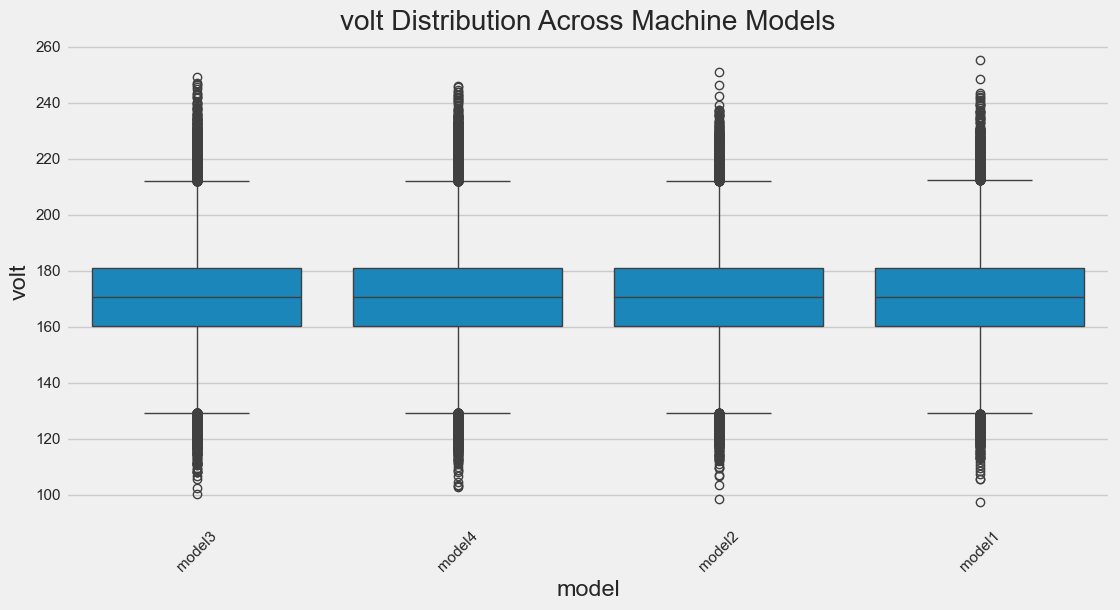


ANOVA Test for rotate across machine models:
F-statistic: 2.4039775401186683
p-value: 0.06544166950889362

Tukey's HSD Test Results:
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
model1 model2   0.4446 0.1054 -0.0589 0.9481  False
model1 model3   0.1453 0.8275 -0.2909 0.5815  False
model1 model4   0.3427 0.1919 -0.0998 0.7853  False
model2 model3  -0.2993 0.2737 -0.7266 0.1281  False
model2 model4  -0.1019 0.9311 -0.5357  0.332  False
model3 model4   0.1974 0.4778 -0.1562 0.5509  False
---------------------------------------------------


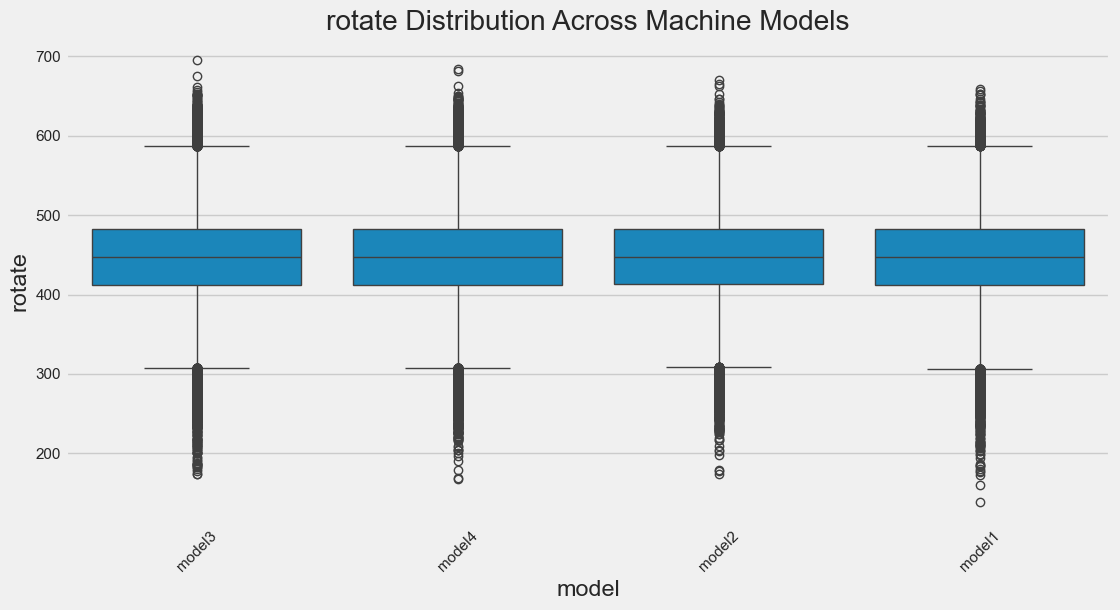


ANOVA Test for pressure across machine models:
F-statistic: 178.70144756933544
p-value: 7.748542291627266e-116

Tukey's HSD Test Results:
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
model1 model2  -0.0569 0.5085 -0.1625  0.0486  False
model1 model3  -0.6109    0.0 -0.7024 -0.5195   True
model1 model4  -0.6072    0.0    -0.7 -0.5144   True
model2 model3   -0.554    0.0 -0.6436 -0.4644   True
model2 model4  -0.5503    0.0 -0.6412 -0.4593   True
model3 model4   0.0037 0.9992 -0.0704  0.0778  False
----------------------------------------------------


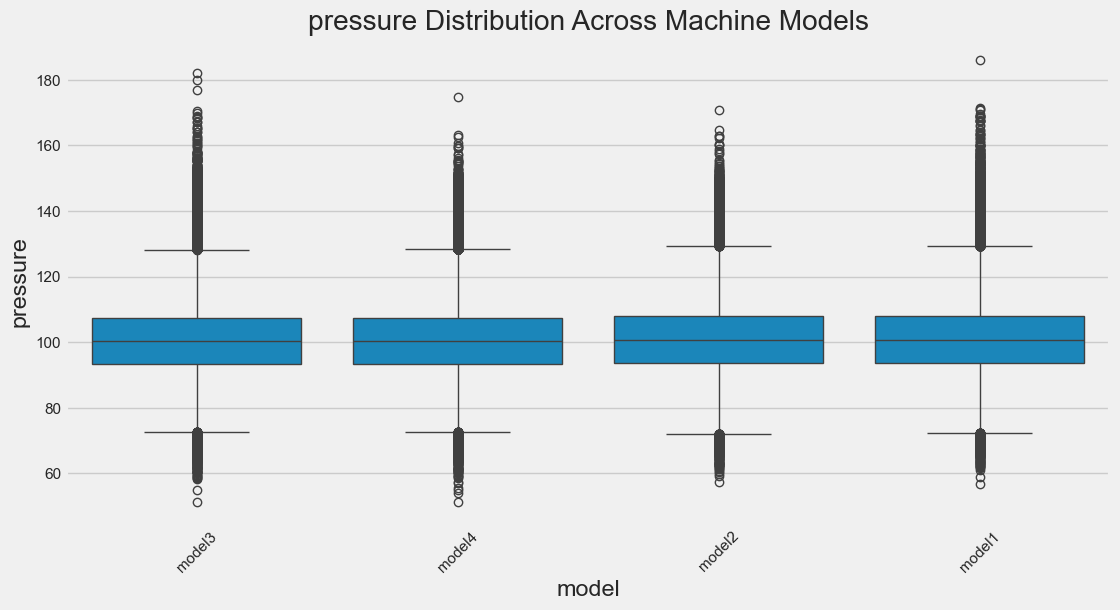


ANOVA Test for vibration across machine models:
F-statistic: 10.701218376041778
p-value: 4.978093407351977e-07

Tukey's HSD Test Results:
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
model1 model2  -0.0451 0.1083 -0.0964  0.0062  False
model1 model3   -0.043 0.0619 -0.0875  0.0014  False
model1 model4  -0.0949    0.0   -0.14 -0.0498   True
model2 model3    0.002 0.9994 -0.0415  0.0456  False
model2 model4  -0.0498   0.02  -0.094 -0.0056   True
model3 model4  -0.0518 0.0013 -0.0879 -0.0158   True
----------------------------------------------------


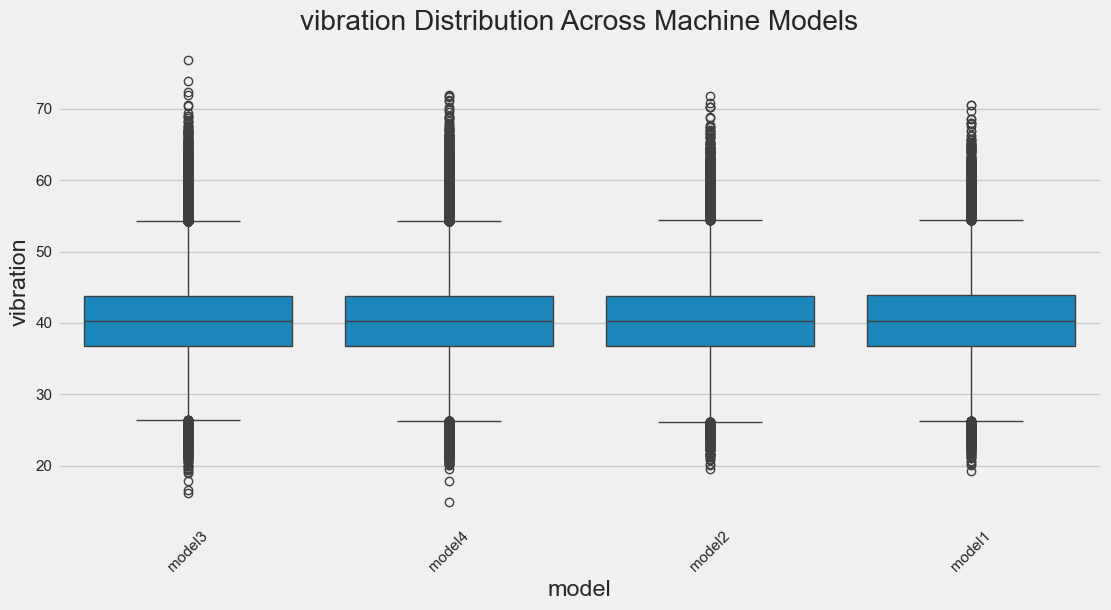

ANOVA test for telemetry across machine models completed.


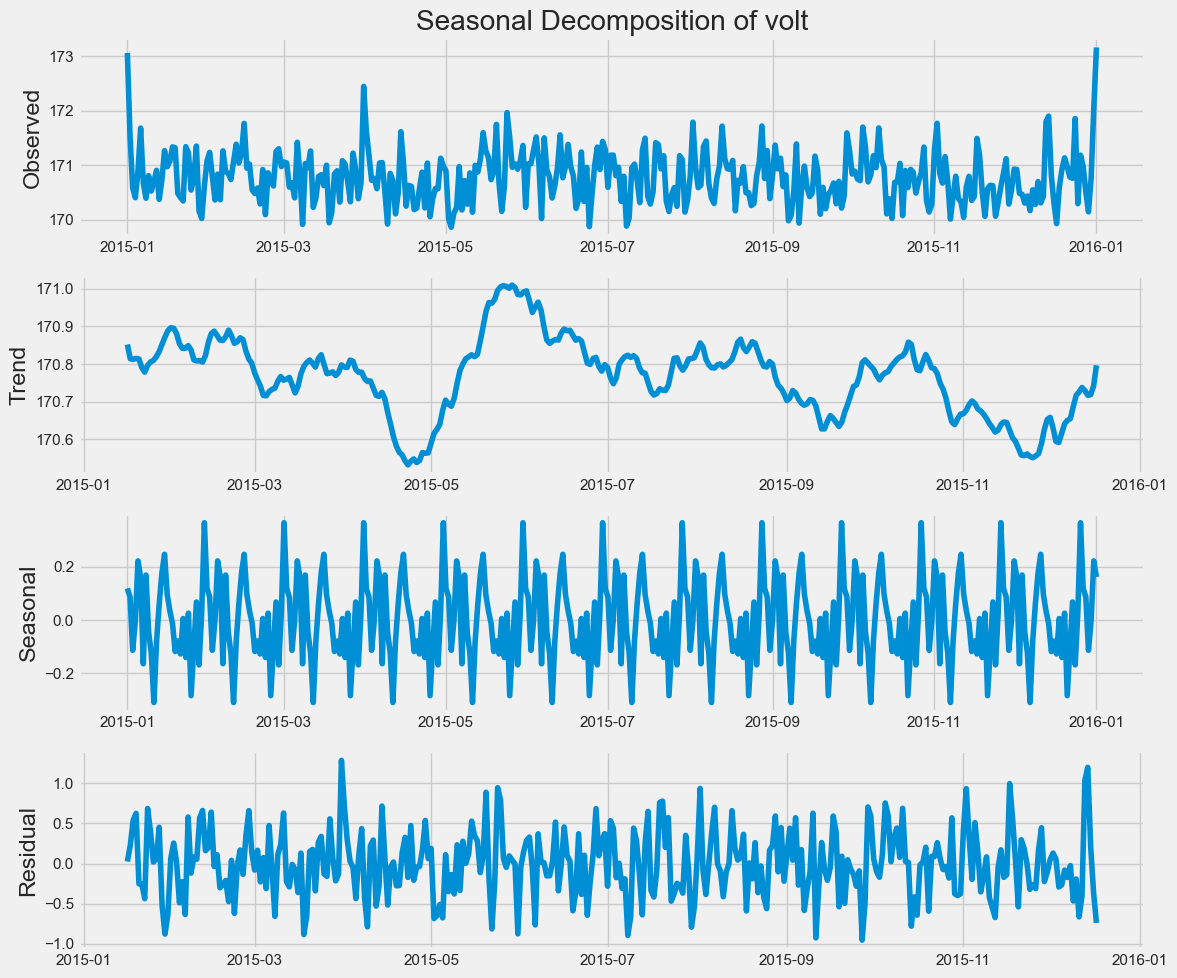

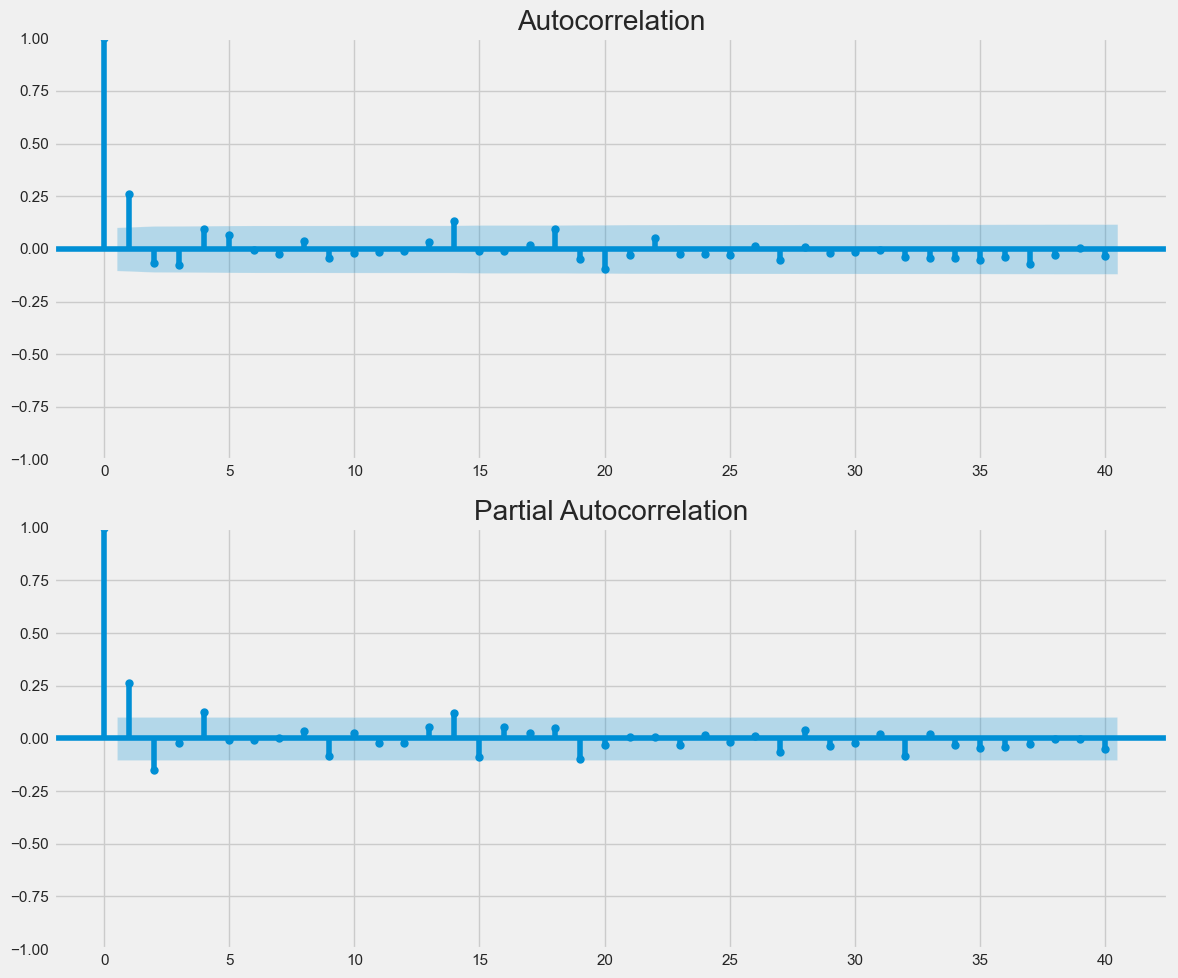

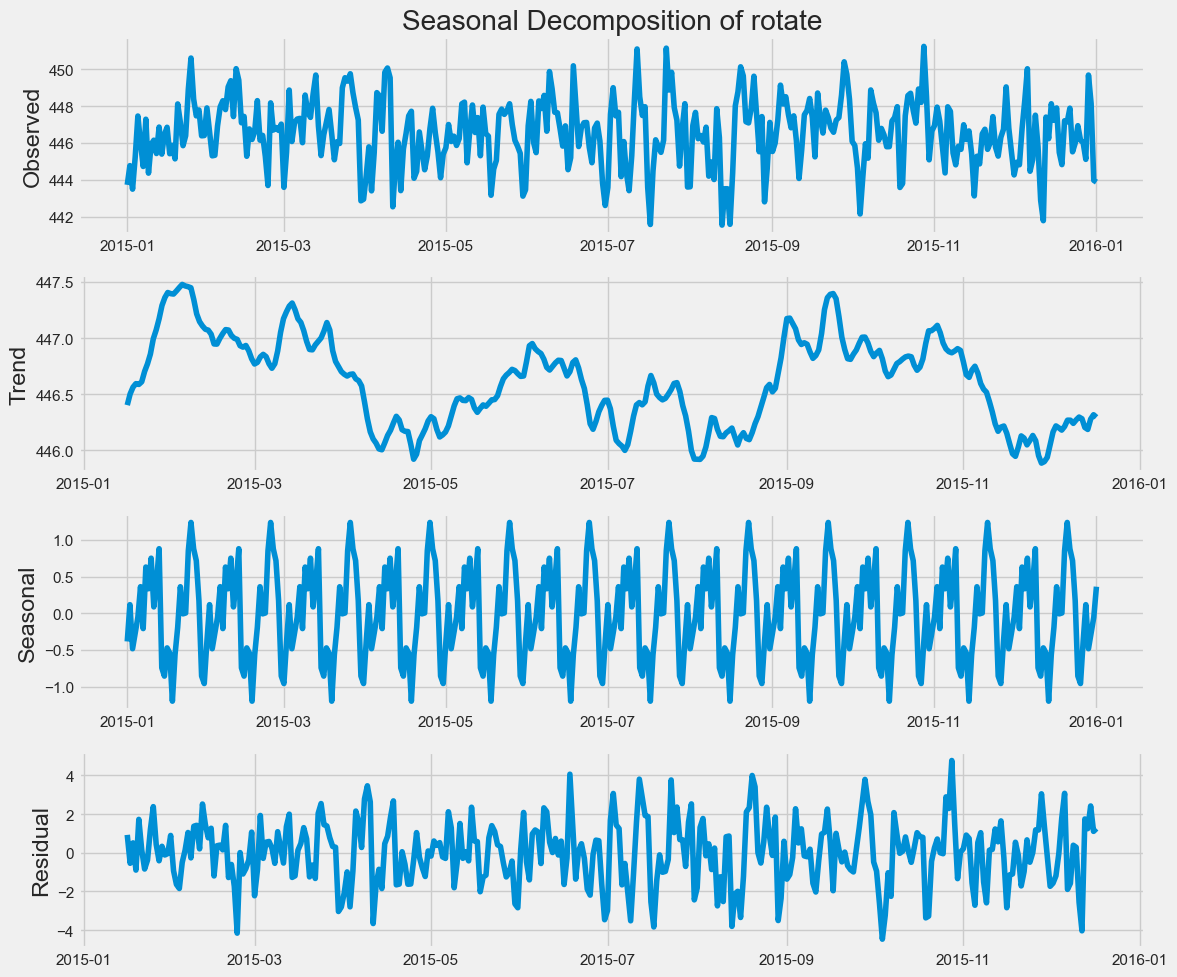

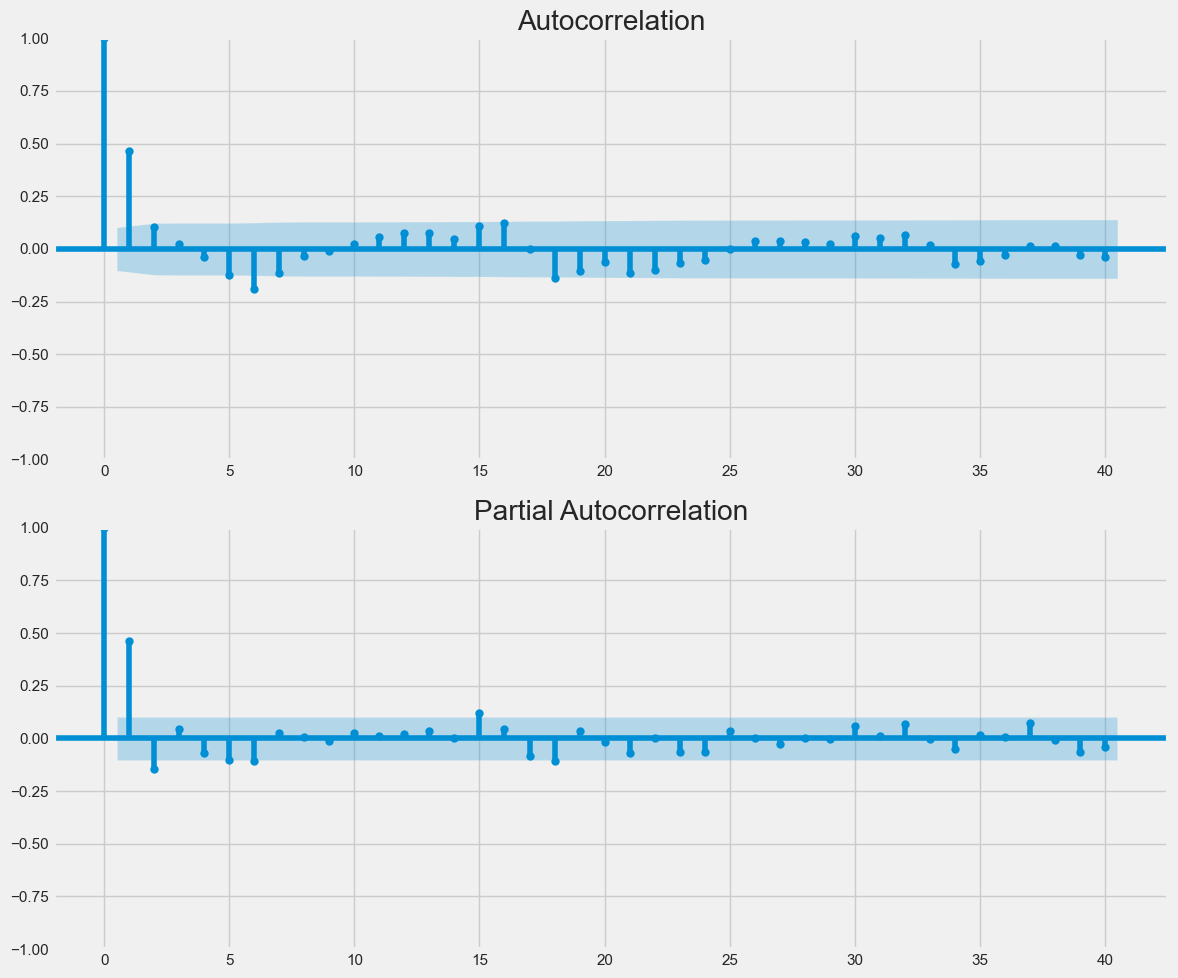

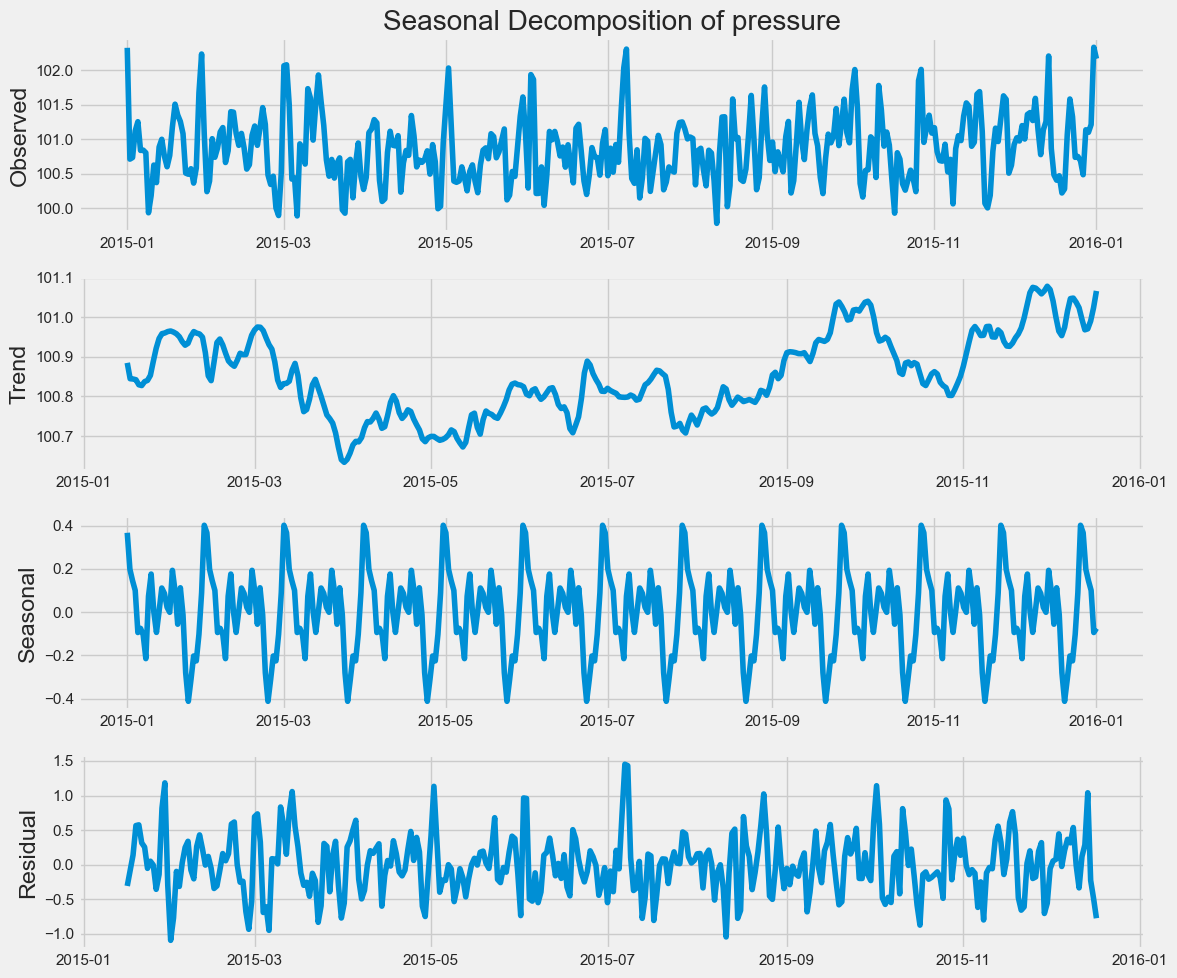

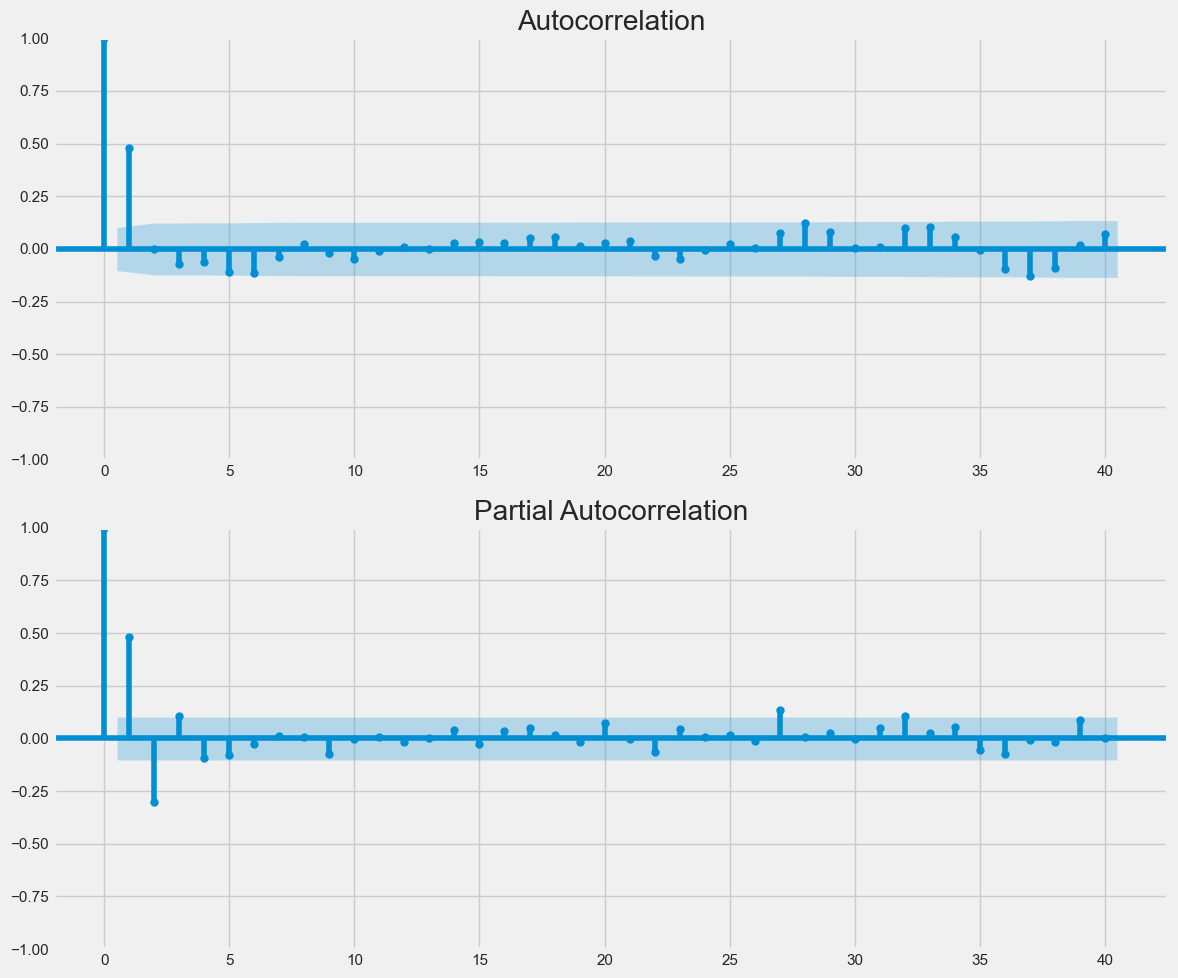

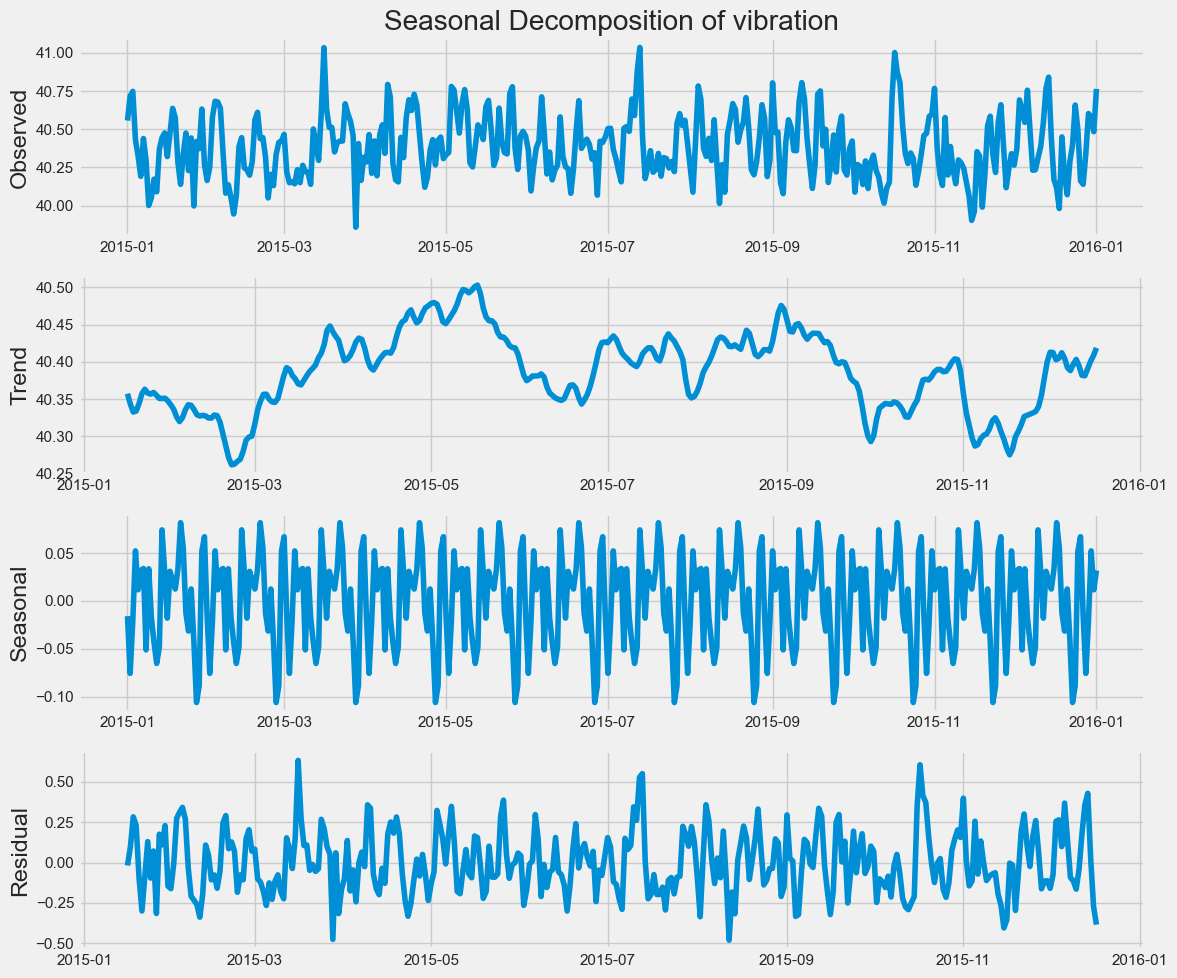

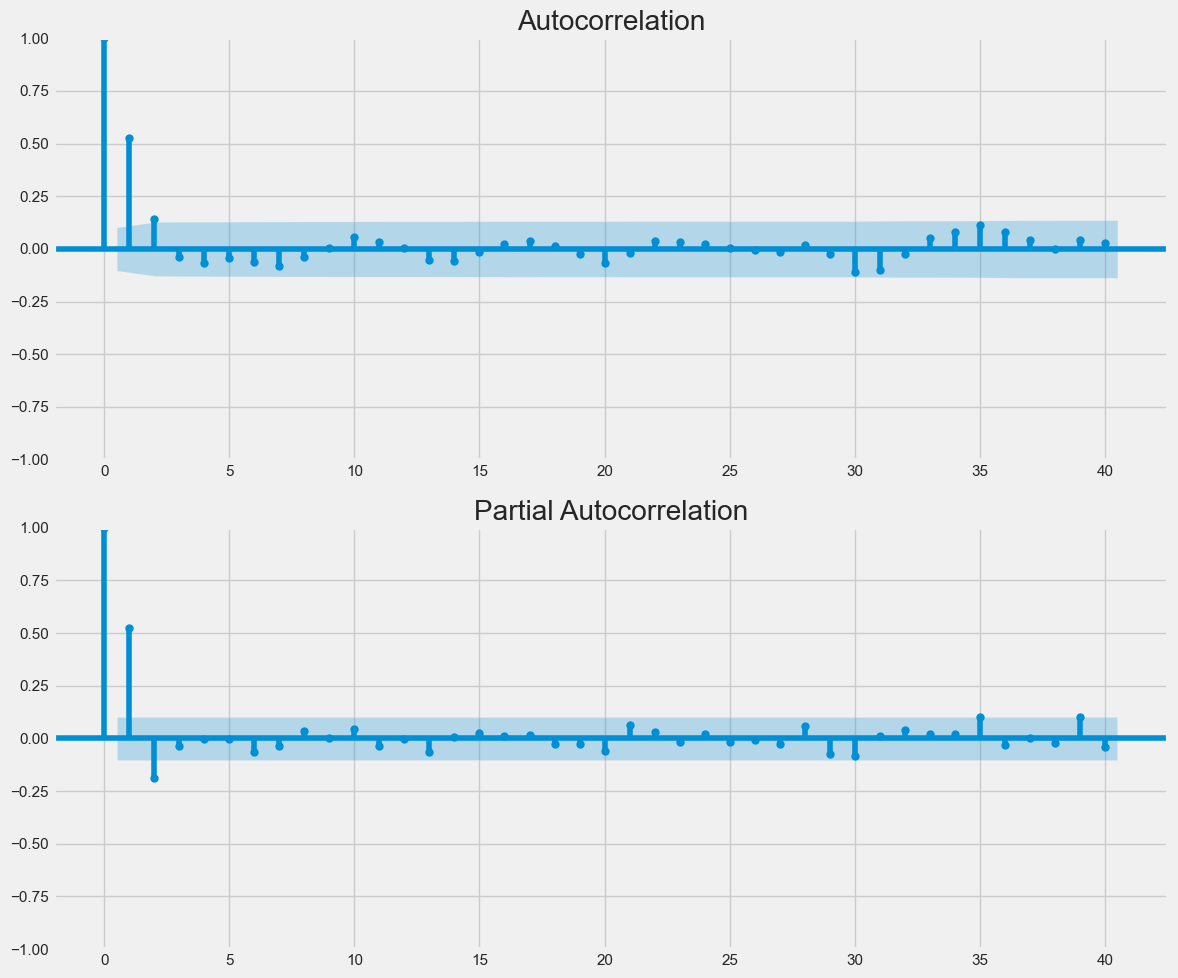

Time series analysis completed.


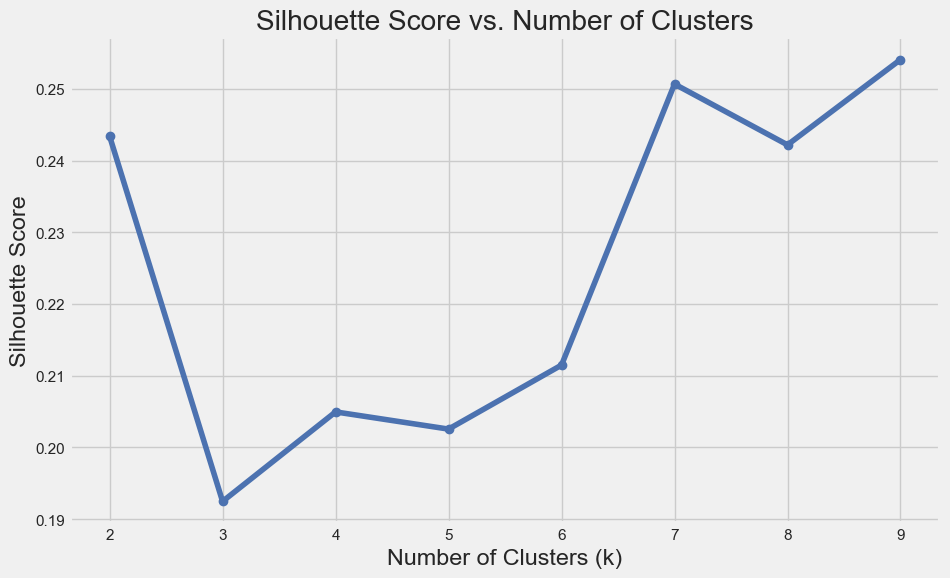

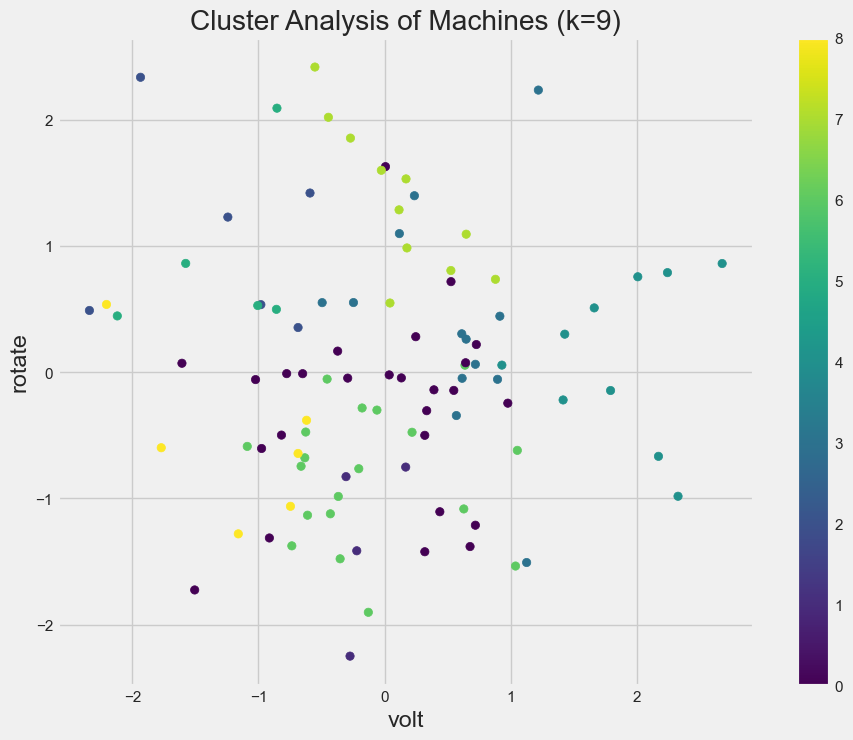

Cluster analysis completed.


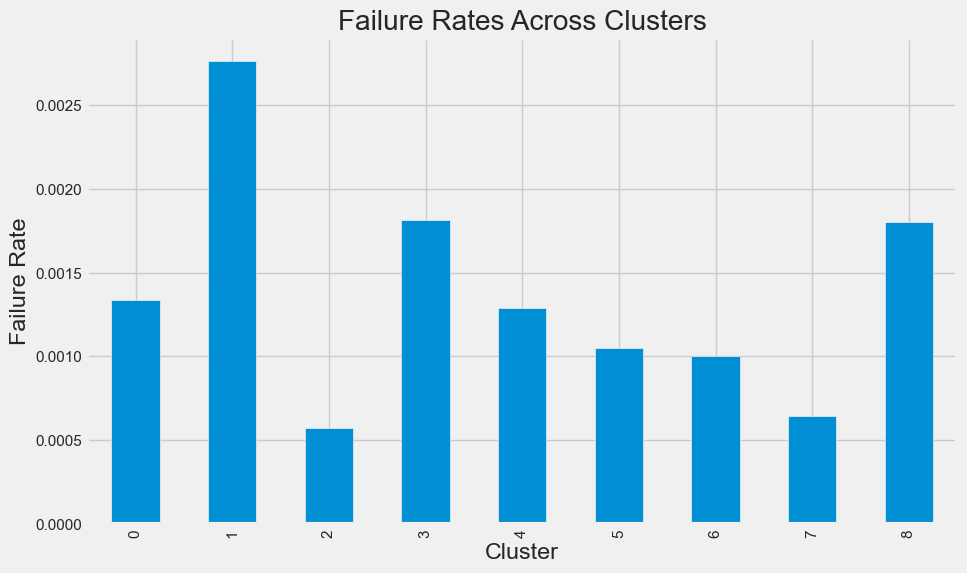


Advanced analyses completed successfully.


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

plt.style.use('fivethirtyeight')

# Assuming merged_df is already loaded from the previous section


def hypothesis_test_age_failures(df):
    """
    Hypothesis: Older machines (age > median) are more likely to experience failures.
    """
    median_age = df['age'].median()
    df['is_old'] = df['age'] > median_age
    df['has_failure'] = df['failure'].notna()

    contingency_table = pd.crosstab(df['is_old'], df['has_failure'])
    chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

    print("Hypothesis Test: Machine Age vs Failure Occurrence")
    print(f"Chi-square statistic: {chi2}")
    print(f"p-value: {p_value}")

    plt.figure(figsize=(10, 6))
    sns.barplot(x=['Young Machines', 'Old Machines'],
                y=[df[~df['is_old']]['has_failure'].mean(), df[df['is_old']]['has_failure'].mean()])
    plt.title('Failure Rate: Young vs Old Machines')
    plt.ylabel('Failure Rate')
    plt.show()


def anova_test_model_telemetry(df):
    """
    ANOVA test to check if different machine models have significantly different telemetry readings.
    """
    telemetry_vars = ['volt', 'rotate', 'pressure', 'vibration']

    for var in telemetry_vars:
        f_statistic, p_value = stats.f_oneway(
            *[group[var].values for name, group in df.groupby('model')])

        print(f"\nANOVA Test for {var} across machine models:")
        print(f"F-statistic: {f_statistic}")
        print(f"p-value: {p_value}")

        # Post-hoc Tukey's test
        tukey_results = pairwise_tukeyhsd(df[var], df['model'])
        print("\nTukey's HSD Test Results:")
        print(tukey_results)

        # Visualize
        plt.figure(figsize=(12, 6))
        sns.boxplot(x='model', y=var, data=df)
        plt.title(f'{var} Distribution Across Machine Models')
        plt.xticks(rotation=45)
        plt.show()


def time_series_analysis(df):
    """
    Perform time series analysis on telemetry data.
    """
    # Resample to daily frequency and take mean
    daily_telemetry = df.set_index(
        'datetime')[['volt', 'rotate', 'pressure', 'vibration']].resample('D').mean()

    for column in daily_telemetry.columns:
        # Seasonal Decomposition
        decomposition = seasonal_decompose(
            daily_telemetry[column], model='additive', period=30)

        plt.figure(figsize=(12, 10))
        plt.subplot(411)
        plt.plot(decomposition.observed)
        plt.title(f"Seasonal Decomposition of {column}")
        plt.ylabel("Observed")
        plt.subplot(412)
        plt.plot(decomposition.trend)
        plt.ylabel("Trend")
        plt.subplot(413)
        plt.plot(decomposition.seasonal)
        plt.ylabel("Seasonal")
        plt.subplot(414)
        plt.plot(decomposition.resid)
        plt.ylabel("Residual")
        plt.tight_layout()
        plt.show()

        # ACF and PACF plots
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))
        plot_acf(daily_telemetry[column], ax=ax1, lags=40)
        plot_pacf(daily_telemetry[column], ax=ax2, lags=40)
        plt.tight_layout()
        plt.show()


def cluster_analysis(df):
    """
    Perform cluster analysis on machines based on their telemetry data.
    """
    # Prepare data for clustering
    features = ['volt', 'rotate', 'pressure', 'vibration']
    X = df.groupby('machineID')[features].mean()

    # Standardize features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Determine optimal number of clusters using silhouette score
    silhouette_scores = []
    K = range(2, 10)
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X_scaled)
        silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

    optimal_k = K[np.argmax(silhouette_scores)]

    # Perform K-means clustering with optimal k
    kmeans = KMeans(n_clusters=optimal_k, random_state=42)
    clusters = kmeans.fit_predict(X_scaled)

    # Visualize results
    plt.figure(figsize=(10, 6))
    plt.plot(K, silhouette_scores, 'bo-')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score vs. Number of Clusters')
    plt.show()

    # Visualize clusters (example with first two features)
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(
        X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis')
    plt.xlabel(features[0])
    plt.ylabel(features[1])
    plt.title(f'Cluster Analysis of Machines (k={optimal_k})')
    plt.colorbar(scatter)
    plt.show()

    return clusters


# Execute the analyses
try:
    print("Starting hypothesis testing and advanced analyses...")

    hypothesis_test_age_failures(merged_df)
    print("Age vs Failures hypothesis test completed.")

    anova_test_model_telemetry(merged_df)
    print("ANOVA test for telemetry across machine models completed.")

    time_series_analysis(merged_df)
    print("Time series analysis completed.")

    clusters = cluster_analysis(merged_df)
    print("Cluster analysis completed.")

    # Add cluster information to the merged dataframe
    # Assuming machineID starts from 1
    merged_df['cluster'] = clusters[merged_df['machineID'] - 1]

    # Additional analysis: Failure rates across clusters
    failure_rates = merged_df.groupby(
        'cluster')['failure'].apply(lambda x: x.notna().mean())
    plt.figure(figsize=(10, 6))
    failure_rates.plot(kind='bar')
    plt.title('Failure Rates Across Clusters')
    plt.xlabel('Cluster')
    plt.ylabel('Failure Rate')
    plt.show()

    print("\nAdvanced analyses completed successfully.")


except Exception as e:
    print(f"An error occurred during advanced analyses: {str(e)}")

In [25]:
%pip install statsmodels scikit-learn

  Using cached scikit_learn-1.5.0-cp312-cp312-macosx_10_9_x86_64.whl.metadata (11 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.5.0-cp312-cp312-macosx_10_9_x86_64.whl (12.1 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)
Note: you may need to restart the kernel to use updated packages.


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from pathlib import Path
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio

# Set up directories
base_path = Path(
    '/Users/ian/Downloads/TechnicalAssessment_DataSet_Data Scientist24005135')
data_path = base_path / 'data'
output_path = base_path / 'output'
json_path = output_path / 'json'
viz_path = output_path / 'visualizations'

# Create directories if they don't exist
for path in [output_path, json_path, viz_path]:
    path.mkdir(parents=True, exist_ok=True)

# Load the merged and cleaned data
merged_df = pd.read_csv(
    data_path / 'merged_cleaned_data.csv', parse_dates=['datetime'])


def save_to_json(data, filename):
    def default(o):
        if isinstance(o, pd.Timestamp):
            return o.isoformat()
        raise TypeError(
            "Object of type '%s' is not JSON serializable" % type(o).__name__)

    with open(json_path / f"{filename}.json", 'w') as f:
        json.dump(data, f, indent=4, default=default)


def save_plotly_fig(fig, filename):
    fig.write_html(viz_path / f"{filename}.html")


def failure_analysis():
    failure_rates = merged_df.groupby('machineID')['failure'].apply(
        lambda x: x.notna().mean()).reset_index()
    failure_rates.columns = ['machineID', 'failure_rate']

    # Save to JSON
    save_to_json(failure_rates.to_dict('records'), 'failure_rates')

    # Create visualization
    fig = px.scatter(failure_rates, x='machineID', y='failure_rate',
                     title='Failure Rates by Machine',
                     labels={'machineID': 'Machine ID', 'failure_rate': 'Failure Rate'})
    fig.update_traces(marker=dict(size=10))
    save_plotly_fig(fig, 'failure_rates_scatter')

    return failure_rates


def telemetry_trends():
    daily_avg = merged_df.groupby(
        'datetime')[['volt', 'rotate', 'pressure', 'vibration']].mean().reset_index()

    # Save to JSON
    save_to_json(daily_avg.to_dict('records'), 'daily_telemetry_avg')

    # Create visualization
    fig = make_subplots(rows=2, cols=2, subplot_titles=(
        'Voltage', 'Rotation', 'Pressure', 'Vibration'))
    for i, col in enumerate(['volt', 'rotate', 'pressure', 'vibration'], 1):
        fig.add_trace(go.Scatter(x=daily_avg['datetime'], y=daily_avg[col], name=col),
                      row=(i-1)//2+1, col=(i-1) % 2+1)
    fig.update_layout(
        height=800, title_text="Daily Average Telemetry Readings")
    save_plotly_fig(fig, 'daily_telemetry_trends')

    return daily_avg


def maintenance_impact():
    # Calculate time since last maintenance for each record
    merged_df['last_maintenance'] = merged_df.groupby('machineID')['datetime'].transform(
        lambda x: x.where(merged_df['comp'] == 'comp1').ffill())
    merged_df['days_since_maintenance'] = (
        merged_df['datetime'] - merged_df['last_maintenance']).dt.days

    # Calculate average telemetry readings based on days since maintenance
    maint_impact = merged_df.groupby('days_since_maintenance')[
        ['volt', 'rotate', 'pressure', 'vibration']].mean().reset_index()

    # Save to JSON
    save_to_json(maint_impact.to_dict('records'), 'maintenance_impact')

    # Create visualization
    fig = make_subplots(rows=2, cols=2, subplot_titles=(
        'Voltage', 'Rotation', 'Pressure', 'Vibration'))
    for i, col in enumerate(['volt', 'rotate', 'pressure', 'vibration'], 1):
        fig.add_trace(go.Scatter(x=maint_impact['days_since_maintenance'], y=maint_impact[col], name=col),
                      row=(i-1)//2+1, col=(i-1) % 2+1)
    fig.update_layout(
        height=800, title_text="Impact of Maintenance on Telemetry Readings")
    fig.update_xaxes(title_text="Days Since Last Maintenance")
    save_plotly_fig(fig, 'maintenance_impact')

    return maint_impact


def error_analysis():
    error_counts = merged_df.groupby(['machineID', 'error'])[
        'datetime'].count().unstack(fill_value=0).reset_index()
    error_counts['total_errors'] = error_counts.iloc[:, 1:].sum(axis=1)

    # Save to JSON
    save_to_json(error_counts.to_dict('records'), 'error_counts')

    # Create visualization
    fig = px.bar(error_counts, x='machineID', y='total_errors',
                 title='Total Errors by Machine',
                 labels={'machineID': 'Machine ID', 'total_errors': 'Total Errors'})
    save_plotly_fig(fig, 'error_counts_bar')

    return error_counts


def machine_clustering():
    from sklearn.preprocessing import StandardScaler
    from sklearn.cluster import KMeans

    # Prepare data for clustering
    features = ['volt', 'rotate', 'pressure', 'vibration']
    X = merged_df.groupby('machineID')[features].mean()

    # Standardize features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Perform K-means clustering
    kmeans = KMeans(n_clusters=3, random_state=42)
    clusters = kmeans.fit_predict(X_scaled)

    # Add cluster information to the dataframe
    cluster_df = pd.DataFrame({'machineID': X.index, 'cluster': clusters})

    # Save to JSON
    save_to_json(cluster_df.to_dict('records'), 'machine_clusters')

    # Create visualization
    fig = px.scatter_3d(X.reset_index(), x='volt', y='rotate', z='pressure',
                        color=clusters, hover_data=['machineID'],
                        title='Machine Clustering based on Telemetry Data')
    save_plotly_fig(fig, 'machine_clusters_3d')

    return cluster_df


# Execute analyses and save results
try:
    print("Starting advanced analyses and visualizations...")

    failure_rates = failure_analysis()
    print("Failure analysis completed and saved.")

    daily_telemetry = telemetry_trends()
    print("Telemetry trends analysis completed and saved.")

    maint_impact = maintenance_impact()
    print("Maintenance impact analysis completed and saved.")

    error_counts = error_analysis()
    print("Error analysis completed and saved.")

    machine_clusters = machine_clustering()
    print("Machine clustering completed and saved.")

    # Combine all results into a final report
    final_report = {
        'failure_rates': failure_rates.to_dict('records'),
        'daily_telemetry': daily_telemetry.to_dict('records'),
        'maintenance_impact': maint_impact.to_dict('records'),
        'error_counts': error_counts.to_dict('records'),
        'machine_clusters': machine_clusters.to_dict('records')
    }

    save_to_json(final_report, 'final_analysis_report')
    print("Final analysis report saved as JSON.")

    print("\nAll analyses completed successfully. Results and visualizations saved in the output directory.")

except Exception as e:
    print(f"An error occurred during the analyses: {str(e)}")

Starting advanced analyses and visualizations...
Failure analysis completed and saved.
Telemetry trends analysis completed and saved.
Maintenance impact analysis completed and saved.
An error occurred during the analyses: 'error'


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
import networkx as nx
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from pathlib import Path

# Set up file paths
base_path = Path('/Users/ian/Downloads/TechnicalAssessment_DataSet_Data Scientist24005135')
data_path = base_path / 'data'
output_path = base_path / 'output'
output_path.mkdir(parents=True, exist_ok=True)

# Load the data
merged_df = pd.read_csv(data_path / 'merged_cleaned_data.csv', parse_dates=['datetime'])

def economic_impact_analysis(df):
    """Analyze the economic impact of failures and maintenance with dynamic interpretation"""
    failure_cost = 10000
    maintenance_cost = 5000
    
    df['failure_cost'] = df['failure'].notna().astype(int) * failure_cost
    df['maintenance_cost'] = df['comp'].notna().astype(int) * maintenance_cost
    df['total_cost'] = df['failure_cost'] + df['maintenance_cost']
    
    monthly_costs = df.set_index('datetime').resample('M')[['failure_cost', 'maintenance_cost', 'total_cost']].sum()
    cumulative_costs = monthly_costs.cumsum()
    
    fig = make_subplots(rows=2, cols=1, subplot_titles=("Monthly Costs", "Cumulative Costs"))
    
    for col in ['failure_cost', 'maintenance_cost', 'total_cost']:
        fig.add_trace(go.Scatter(x=monthly_costs.index, y=monthly_costs[col], name=col.replace('_', ' ').title()), row=1, col=1)
        fig.add_trace(go.Scatter(x=cumulative_costs.index, y=cumulative_costs[col], name=f"Cumulative {col.replace('_', ' ').title()}"), row=2, col=1)
    
    fig.update_layout(height=800, title_text="Economic Impact Analysis")
    fig.write_html(output_path / 'economic_impact_analysis.html')
    
    maintenance_events = df[df['comp'].notna()]
    maintenance_events['next_failure'] = maintenance_events.groupby('machineID')['datetime'].transform(lambda x: x.shift(-1))
    maintenance_events['time_to_failure'] = (maintenance_events['next_failure'] - maintenance_events['datetime']).dt.days
    
    avg_time_to_failure = maintenance_events['time_to_failure'].mean()
    daily_failure_cost = failure_cost / avg_time_to_failure
    daily_maintenance_cost = maintenance_cost / avg_time_to_failure
    
    roi = (daily_failure_cost - daily_maintenance_cost) / daily_maintenance_cost * 100
    
    interpretation = f"""
    Economic Impact Analysis Interpretation:
    1. The total cumulative cost over the period is ${cumulative_costs['total_cost'].iloc[-1]:,.2f}.
    2. On average, monthly failure costs are ${monthly_costs['failure_cost'].mean():,.2f}, while monthly maintenance costs are ${monthly_costs['maintenance_cost'].mean():,.2f}.
    3. The estimated ROI of maintenance is {roi:.2f}%, suggesting that {'maintenance is cost-effective' if roi > 0 else 'the current maintenance strategy may need revision'}.
    4. The average time between maintenance and the next failure is {avg_time_to_failure:.2f} days, indicating {'a good maintenance interval' if avg_time_to_failure > 30 else 'that maintenance frequency might need to be increased'}.
    """
    
    return monthly_costs, roi, interpretation

def advanced_time_series_analysis(df):
    """Perform advanced time series analysis on telemetry data with dynamic interpretation"""
    daily_telemetry = df.set_index('datetime')[['volt', 'rotate', 'pressure', 'vibration']].resample('D').mean()
    
    results = {}
    interpretations = {}
    for col in daily_telemetry.columns:
        decomposition = seasonal_decompose(daily_telemetry[col], model='additive', period=30)
        
        model = ARIMA(daily_telemetry[col], order=(1,1,1))
        results[col] = model.fit()
        
        fig = make_subplots(rows=3, cols=1, subplot_titles=("Original", "Trend", "Seasonal", "Residual"))
        fig.add_trace(go.Scatter(x=daily_telemetry.index, y=daily_telemetry[col], name="Original"), row=1, col=1)
        fig.add_trace(go.Scatter(x=decomposition.trend.index, y=decomposition.trend, name="Trend"), row=2, col=1)
        fig.add_trace(go.Scatter(x=decomposition.seasonal.index, y=decomposition.seasonal, name="Seasonal"), row=3, col=1)
        fig.add_trace(go.Scatter(x=decomposition.resid.index, y=decomposition.resid, name="Residual"), row=3, col=1)
        fig.update_layout(height=1000, title_text=f"Time Series Analysis of {col}")
        fig.write_html(output_path / f'time_series_analysis_{col}.html')
        
        trend_direction = "increasing" if decomposition.trend.iloc[-1] > decomposition.trend.iloc[0] else "decreasing"
        seasonality_strength = decomposition.seasonal.abs().mean() / daily_telemetry[col].std()
        
        interpretations[col] = f"""
        Time Series Analysis Interpretation for {col}:
        1. The overall trend is {trend_direction} over the observed period.
        2. Seasonality strength is {seasonality_strength:.2f}, indicating {'strong' if seasonality_strength > 0.5 else 'weak'} seasonal patterns.
        3. The ARIMA model suggests {'significant' if results[col].pvalues.mean() < 0.05 else 'limited'} predictability in the time series.
        4. Residuals show {'patterns' if results[col].resid.autocorr(1) > 0.2 else 'no significant patterns'}, suggesting {'room for model improvement' if results[col].resid.autocorr(1) > 0.2 else 'a good fit'}.
        """
    
    return results, interpretations

def machine_state_clustering(df):
    """Cluster machines based on their telemetry states with dynamic interpretation"""
    X = df.groupby('machineID')[['volt', 'rotate', 'pressure', 'vibration']].mean()
    X_scaled = StandardScaler().fit_transform(X)
    
    dbscan = DBSCAN(eps=0.5, min_samples=3)
    clusters = dbscan.fit_predict(X_scaled)
    
    silhouette_avg = silhouette_score(X_scaled, clusters)
    
    pca = PCA(n_components=3)
    X_pca = pca.fit_transform(X_scaled)
    
    fig = px.scatter_3d(x=X_pca[:, 0], y=X_pca[:, 1], z=X_pca[:, 2], color=clusters,
                        labels={'color': 'Cluster'},
                        title=f"Machine State Clustering (Silhouette Score: {silhouette_avg:.2f})")
    fig.write_html(output_path / 'machine_state_clustering.html')
    
    interpretation = f"""
    Machine State Clustering Interpretation:
    1. The clustering algorithm identified {len(set(clusters))} distinct clusters of machines.
    2. The silhouette score of {silhouette_avg:.2f} indicates {'good' if silhouette_avg > 0.5 else 'moderate' if silhouette_avg > 0.3 else 'poor'} cluster separation.
    3. {'Some machines are classified as noise' if -1 in clusters else 'All machines are assigned to clusters'}, suggesting {'potential outliers or unique machine states' if -1 in clusters else 'consistent operational patterns across machines'}.
    4. The 3D visualization {'shows clear separation between clusters' if silhouette_avg > 0.5 else 'indicates some overlap between clusters'}, implying {'distinct' if silhouette_avg > 0.5 else 'somewhat similar'} operational states across different groups of machines.
    """
    
    return clusters, interpretation

def failure_prediction_model(df):
    """Develop a failure prediction model with dynamic interpretation"""
    X = df.groupby('machineID')[['volt', 'rotate', 'pressure', 'vibration']].mean()
    y = df.groupby('machineID')['failure'].apply(lambda x: x.notna().sum() > 0)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model = LogisticRegression()
    model.fit(X_train, y_train)
    
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    
    importance = pd.DataFrame({'feature': X.columns, 'importance': abs(model.coef_[0])})
    importance = importance.sort_values('importance', ascending=False)
    
    fig = px.bar(importance, x='feature', y='importance', title="Feature Importance for Failure Prediction")
    fig.write_html(output_path / 'failure_prediction_feature_importance.html')
    
    interpretation = f"""
    Failure Prediction Model Interpretation:
    1. The model achieves an accuracy of {test_score:.2f} on the test set, indicating {'strong' if test_score > 0.8 else 'moderate' if test_score > 0.6 else 'weak'} predictive power.
    2. The most important feature for predicting failures is {importance.iloc[0]['feature']}, followed by {importance.iloc[1]['feature']}.
    3. The difference between train ({train_score:.2f}) and test ({test_score:.2f}) accuracy suggests {'potential overfitting' if train_score - test_score > 0.1 else 'good generalization'}.
    4. Based on feature importance, {'all telemetry variables contribute significantly' if importance['importance'].min() / importance['importance'].max() > 0.5 else 'some telemetry variables are much more predictive than others'} to failure prediction.
    """
    
    return model, importance, interpretation

def network_analysis(df):
    """Analyze the network of machine interactions with dynamic interpretation"""
    telemetry_corr = df.groupby('machineID')[['volt', 'rotate', 'pressure', 'vibration']].mean().corr()
    
    G = nx.Graph()
    for i in range(len(telemetry_corr)):
        for j in range(i+1, len(telemetry_corr)):
            if abs(telemetry_corr.iloc[i, j]) > 0.5:
                G.add_edge(telemetry_corr.index[i], telemetry_corr.index[j], weight=abs(telemetry_corr.iloc[i, j]))
    
    degree_centrality = nx.degree_centrality(G)
    betweenness_centrality = nx.betweenness_centrality(G)
    
    pos = nx.spring_layout(G)
    edge_x, edge_y = [], []
    for edge in G.edges():
        x0, y0 = pos[edge[0]]
        x1, y1 = pos[edge[1]]
        edge_x.extend([x0, x1, None])
        edge_y.extend([y0, y1, None])

    edge_trace = go.Scatter(x=edge_x, y=edge_y, line=dict(width=0.5, color='#888'), hoverinfo='none', mode='lines')

    node_x = [pos[node][0] for node in G.nodes()]
    node_y = [pos[node][1] for node in G.nodes()]

    node_trace = go.Scatter(x=node_x, y=node_y, mode='markers', hoverinfo='text',
                            marker=dict(showscale=True, colorscale='YlGnBu', size=10, colorbar=dict(thickness=15, title='Node Importance')))

    node_adjacencies = []
    node_text = []
    for node, adjacencies in enumerate(G.adjacency()):
        node_adjacencies.append(len(adjacencies[1]))
        node_text.append(f'Machine {node}: Degree Centrality: {degree_centrality[node]:.2f}, Betweenness Centrality: {betweenness_centrality[node]:.2f}')

    node_trace.marker.color = node_adjacencies
    node_trace.text = node_text

    fig = go.Figure(data=[edge_trace, node_trace],
                    layout=go.Layout(title='Network of Machine Interactions', showlegend=False, hovermode='closest',
                                     margin=dict(b=20,l=5,r=5,t=40),
                                     xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                                     yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)))
    fig.write_html(output_path / 'machine_network_analysis.html')
    
    avg_degree = np.mean(list(degree_centrality.values()))
    max_betweenness = max(betweenness_centrality.values())
    max_betweenness_node = max(betweenness_centrality, key=betweenness_centrality.get)
    
    interpretation = f"""
    Network Analysis Interpretation:
    1. The network consists of {len(G.nodes())} nodes (machines) and {len(G.edges())} edges (strong correlations).
    2. The average degree centrality is {avg_degree:.2f}, indicating {'high' if avg_degree > 0.5 else 'moderate' if avg_degree > 0.3 else 'low'} connectivity among machines.
    3. Machine {max_betweenness_node} has the highest betweenness centrality ({max_betweenness:.2f}), suggesting it plays a crucial role in the network's structure.
    4. The network structure reveals {'distinct communities' if nx.average_clustering(G) > 0.5 else 'a more uniform interaction pattern'} among machines.
    5. {'Some machines are isolated' if len(list(nx.isolates(G))) > 0 else 'All machines are connected'} in the network, implying {'potential outliers or independent operations' if len(list(nx.isolates(G))) > 0 else 'strong interdependencies across all machines'}.
    """
    
    return G, degree_centrality, betweenness_centrality, interpretation

#

In [33]:
import subprocess
import sys

# Try to import ripser, handle potential import issues
try:
    import ripser
except ImportError:
    print("ripser module is not installed. Installing now...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", "ripser"])

# Check numpy version and downgrade if necessary
import numpy as np
if np.__version__.startswith('2'):
    print("Downgrading numpy to the latest 1.x version for compatibility...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", "numpy<2"])
    print("Please restart your Python kernel to apply the changes.")

# Re-import packages after fixing
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import networkx as nx

# After restarting the kernel, check if ripser can be imported successfully
try:
    from ripser import ripser, plot_diagrams
except ImportError as e:
    print(f"Still failed to import ripser after fixing: {e}")


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/Users/ian/Downloads/TechnicalAssessment_DataSet_Data Scientist24005135/.venv/lib/python3.12/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/Users/ian/Downloads/TechnicalAssessment_DataSet_Data Scientist24005135/.venv/lib/python3.12/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  File "/Users/ian/Downloads/Technical

ripser module is not installed. Installing now...


Downgrading numpy to the latest 1.x version for compatibility...
  Using cached numpy-1.26.4-cp312-cp312-macosx_10_9_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp312-cp312-macosx_10_9_x86_64.whl (20.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.0
    Uninstalling numpy-2.0.0:
      Successfully uninstalled numpy-2.0.0
Please restart your Python kernel to apply the changes.
Still failed to import ripser after fixing: numpy.core.multiarray failed to import (auto-generated because you didn't call 'numpy.import_array()' after cimporting numpy; use '<void>numpy._import_array' to disable if you are certain you don't need it).



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/Users/ian/Downloads/TechnicalAssessment_DataSet_Data Scientist24005135/.venv/lib/python3.12/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/Users/ian/Downloads/TechnicalAssessment_DataSet_Data Scientist24005135/.venv/lib/python3.12/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  File "/Users/ian/Downloads/Technical

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
import networkx as nx
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from pathlib import Path

# Set up file paths
base_path = Path('/Users/ian/Downloads/TechnicalAssessment_DataSet_Data Scientist24005135')
data_path = base_path / 'data'
output_path = base_path / 'output'
output_path.mkdir(parents=True, exist_ok=True)

# Load the data
merged_df = pd.read_csv(data_path / 'merged_cleaned_data.csv', parse_dates=['datetime'])

def economic_impact_analysis(df):
    """Analyze the economic impact of failures and maintenance with dynamic interpretation"""
    failure_cost = 10000
    maintenance_cost = 5000
    
    df['failure_cost'] = df['failure'].notna().astype(int) * failure_cost
    df['maintenance_cost'] = df['comp'].notna().astype(int) * maintenance_cost
    df['total_cost'] = df['failure_cost'] + df['maintenance_cost']
    
    monthly_costs = df.set_index('datetime').resample('M')[['failure_cost', 'maintenance_cost', 'total_cost']].sum()
    cumulative_costs = monthly_costs.cumsum()
    
    fig = make_subplots(rows=2, cols=1, subplot_titles=("Monthly Costs", "Cumulative Costs"))
    
    for col in ['failure_cost', 'maintenance_cost', 'total_cost']:
        fig.add_trace(go.Scatter(x=monthly_costs.index, y=monthly_costs[col], name=col.replace('_', ' ').title()), row=1, col=1)
        fig.add_trace(go.Scatter(x=cumulative_costs.index, y=cumulative_costs[col], name=f"Cumulative {col.replace('_', ' ').title()}"), row=2, col=1)
    
    fig.update_layout(height=800, title_text="Economic Impact Analysis")
    fig.write_html(output_path / 'economic_impact_analysis.html')
    
    maintenance_events = df[df['comp'].notna()]
    maintenance_events['next_failure'] = maintenance_events.groupby('machineID')['datetime'].transform(lambda x: x.shift(-1))
    maintenance_events['time_to_failure'] = (maintenance_events['next_failure'] - maintenance_events['datetime']).dt.days
    
    avg_time_to_failure = maintenance_events['time_to_failure'].mean()
    daily_failure_cost = failure_cost / avg_time_to_failure
    daily_maintenance_cost = maintenance_cost / avg_time_to_failure
    
    roi = (daily_failure_cost - daily_maintenance_cost) / daily_maintenance_cost * 100
    
    interpretation = f"""
    Economic Impact Analysis Interpretation:
    1. The total cumulative cost over the period is ${cumulative_costs['total_cost'].iloc[-1]:,.2f}.
    2. On average, monthly failure costs are ${monthly_costs['failure_cost'].mean():,.2f}, while monthly maintenance costs are ${monthly_costs['maintenance_cost'].mean():,.2f}.
    3. The estimated ROI of maintenance is {roi:.2f}%, suggesting that {'maintenance is cost-effective' if roi > 0 else 'the current maintenance strategy may need revision'}.
    4. The average time between maintenance and the next failure is {avg_time_to_failure:.2f} days, indicating {'a good maintenance interval' if avg_time_to_failure > 30 else 'that maintenance frequency might need to be increased'}.
    """
    
    return monthly_costs, roi, interpretation

def advanced_time_series_analysis(df):
    """Perform advanced time series analysis on telemetry data with dynamic interpretation"""
    daily_telemetry = df.set_index('datetime')[['volt', 'rotate', 'pressure', 'vibration']].resample('D').mean()
    
    results = {}
    interpretations = {}
    for col in daily_telemetry.columns:
        decomposition = seasonal_decompose(daily_telemetry[col], model='additive', period=30)
        
        model = ARIMA(daily_telemetry[col], order=(1,1,1))
        results[col] = model.fit()
        
        fig = make_subplots(rows=3, cols=1, subplot_titles=("Original", "Trend", "Seasonal", "Residual"))
        fig.add_trace(go.Scatter(x=daily_telemetry.index, y=daily_telemetry[col], name="Original"), row=1, col=1)
        fig.add_trace(go.Scatter(x=decomposition.trend.index, y=decomposition.trend, name="Trend"), row=2, col=1)
        fig.add_trace(go.Scatter(x=decomposition.seasonal.index, y=decomposition.seasonal, name="Seasonal"), row=3, col=1)
        fig.add_trace(go.Scatter(x=decomposition.resid.index, y=decomposition.resid, name="Residual"), row=3, col=1)
        fig.update_layout(height=1000, title_text=f"Time Series Analysis of {col}")
        fig.write_html(output_path / f'time_series_analysis_{col}.html')
        
        trend_direction = "increasing" if decomposition.trend.iloc[-1] > decomposition.trend.iloc[0] else "decreasing"
        seasonality_strength = decomposition.seasonal.abs().mean() / daily_telemetry[col].std()
        
        interpretations[col] = f"""
        Time Series Analysis Interpretation for {col}:
        1. The overall trend is {trend_direction} over the observed period.
        2. Seasonality strength is {seasonality_strength:.2f}, indicating {'strong' if seasonality_strength > 0.5 else 'weak'} seasonal patterns.
        3. The ARIMA model suggests {'significant' if results[col].pvalues.mean() < 0.05 else 'limited'} predictability in the time series.
        4. Residuals show {'patterns' if results[col].resid.autocorr(1) > 0.2 else 'no significant patterns'}, suggesting {'room for model improvement' if results[col].resid.autocorr(1) > 0.2 else 'a good fit'}.
        """
    
    return results, interpretations

def machine_state_clustering(df):
    """Cluster machines based on their telemetry states with dynamic interpretation"""
    X = df.groupby('machineID')[['volt', 'rotate', 'pressure', 'vibration']].mean()
    X_scaled = StandardScaler().fit_transform(X)
    
    dbscan = DBSCAN(eps=0.5, min_samples=3)
    clusters = dbscan.fit_predict(X_scaled)
    
    silhouette_avg = silhouette_score(X_scaled, clusters)
    
    pca = PCA(n_components=3)
    X_pca = pca.fit_transform(X_scaled)
    
    fig = px.scatter_3d(x=X_pca[:, 0], y=X_pca[:, 1], z=X_pca[:, 2], color=clusters,
                        labels={'color': 'Cluster'},
                        title=f"Machine State Clustering (Silhouette Score: {silhouette_avg:.2f})")
    fig.write_html(output_path / 'machine_state_clustering.html')
    
    interpretation = f"""
    Machine State Clustering Interpretation:
    1. The clustering algorithm identified {len(set(clusters))} distinct clusters of machines.
    2. The silhouette score of {silhouette_avg:.2f} indicates {'good' if silhouette_avg > 0.5 else 'moderate' if silhouette_avg > 0.3 else 'poor'} cluster separation.
    3. {'Some machines are classified as noise' if -1 in clusters else 'All machines are assigned to clusters'}, suggesting {'potential outliers or unique machine states' if -1 in clusters else 'consistent operational patterns across machines'}.
    4. The 3D visualization {'shows clear separation between clusters' if silhouette_avg > 0.5 else 'indicates some overlap between clusters'}, implying {'distinct' if silhouette_avg > 0.5 else 'somewhat similar'} operational states across different groups of machines.
    """
    
    return clusters, interpretation

def failure_prediction_model(df):
    """Develop a failure prediction model with dynamic interpretation"""
    X = df.groupby('machineID')[['volt', 'rotate', 'pressure', 'vibration']].mean()
    y = df.groupby('machineID')['failure'].apply(lambda x: x.notna().sum() > 0)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model = LogisticRegression()
    model.fit(X_train, y_train)
    
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    
    importance = pd.DataFrame({'feature': X.columns, 'importance': abs(model.coef_[0])})
    importance = importance.sort_values('importance', ascending=False)
    
    fig = px.bar(importance, x='feature', y='importance', title="Feature Importance for Failure Prediction")
    fig.write_html(output_path / 'failure_prediction_feature_importance.html')
    
    interpretation = f"""
    Failure Prediction Model Interpretation:
    1. The model achieves an accuracy of {test_score:.2f} on the test set, indicating {'strong' if test_score > 0.8 else 'moderate' if test_score > 0.6 else 'weak'} predictive power.
    2. The most important feature for predicting failures is {importance.iloc[0]['feature']}, followed by {importance.iloc[1]['feature']}.
    3. The difference between train ({train_score:.2f}) and test ({test_score:.2f}) accuracy suggests {'potential overfitting' if train_score - test_score > 0.1 else 'good generalization'}.
    4. Based on feature importance, {'all telemetry variables contribute significantly' if importance['importance'].min() / importance['importance'].max() > 0.5 else 'some telemetry variables are much more predictive than others'} to failure prediction.
    """
    
    return model, importance, interpretation

def network_analysis(df):
    """Analyze the network of machine interactions with dynamic interpretation"""
    telemetry_corr = df.groupby('machineID')[['volt', 'rotate', 'pressure', 'vibration']].mean().corr()
    
    G = nx.Graph()
    for i in range(len(telemetry_corr)):
        for j in range(i+1, len(telemetry_corr)):
            if abs(telemetry_corr.iloc[i, j]) > 0.5:
                G.add_edge(telemetry_corr.index[i], telemetry_corr.index[j], weight=abs(telemetry_corr.iloc[i, j]))
    
    degree_centrality = nx.degree_centrality(G)
    betweenness_centrality = nx.betweenness_centrality(G)
    
    pos = nx.spring_layout(G)
    edge_x, edge_y = [], []
    for edge in G.edges():
        x0, y0 = pos[edge[0]]
        x1, y1 = pos[edge[1]]
        edge_x.extend([x0, x1, None])
        edge_y.extend([y0, y1, None])

    edge_trace = go.Scatter(x=edge_x, y=edge_y, line=dict(width=0.5, color='#888'), hoverinfo='none', mode='lines')

    node_x = [pos[node][0] for node in G.nodes()]
    node_y = [pos[node][1] for node in G.nodes()]

    node_trace = go.Scatter(x=node_x, y=node_y, mode='markers', hoverinfo='text',
                            marker=dict(showscale=True, colorscale='YlGnBu', size=10, colorbar=dict(thickness=15, title='Node Importance')))

    node_adjacencies = []
    node_text = []
    for node, adjacencies in enumerate(G.adjacency()):
        node_adjacencies.append(len(adjacencies[1]))
        node_text.append(f'Machine {node}: Degree Centrality: {degree_centrality[node]:.2f}, Betweenness Centrality: {betweenness_centrality[node]:.2f}')

    node_trace.marker.color = node_adjacencies
    node_trace.text = node_text

    fig = go.Figure(data=[edge_trace, node_trace],
                    layout=go.Layout(title='Network of Machine Interactions', showlegend=False, hovermode='closest',
                                     margin=dict(b=20,l=5,r=5,t=40),
                                     xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                                     yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)))
    fig.write_html(output_path / 'machine_network_analysis.html')
    
    avg_degree = np.mean(list(degree_centrality.values()))
    max_betweenness = max(betweenness_centrality.values())
    max_betweenness_node = max(betweenness_centrality, key=betweenness_centrality.get)
    
    interpretation = f"""
    Network Analysis Interpretation:
    1. The network consists of {len(G.nodes())} nodes (machines) and {len(G.edges())} edges (strong correlations).
    2. The average degree centrality is {avg_degree:.2f}, indicating {'high' if avg_degree > 0.5 else 'moderate' if avg_degree > 0.3 else 'low'} connectivity among machines.
    3. Machine {max_betweenness_node} has the highest betweenness centrality ({max_betweenness:.2f}), suggesting it plays a crucial role in the network's structure.
    4. The network structure reveals {'distinct communities' if nx.average_clustering(G) > 0.5 else 'a more uniform interaction pattern'} among machines.
    5. {'Some machines are isolated' if len(list(nx.isolates(G))) > 0 else 'All machines are connected'} in the network, implying {'potential outliers or independent operations' if len(list(nx.isolates(G))) > 0 else 'strong interdependencies across all machines'}.
    """
    
    return G, degree_centrality, betweenness_centrality, interpretation

#

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
import networkx as nx
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from pathlib import Path

# Set up file paths
base_path = Path('/Users/ian/Downloads/TechnicalAssessment_DataSet_Data Scientist24005135')
data_path = base_path / 'data'
output_path = base_path / 'output'
output_path.mkdir(parents=True, exist_ok=True)

# Load the data
merged_df = pd.read_csv(data_path / 'merged_cleaned_data.csv', parse_dates=['datetime'])

def create_executive_summary(economic_results, time_series_results, clustering_results, prediction_results, network_results):
    """Create an executive summary of all analyses"""
    summary = f"""
    Executive Summary:
    
    1. Economic Impact:
    {economic_results['interpretation']}
    
    2. Time Series Analysis:
    {time_series_results['interpretation']}
    
    3. Machine State Clustering:
    {clustering_results['interpretation']}
    
    4. Failure Prediction:
    {prediction_results['interpretation']}
    
    5. Network Analysis:
    {network_results['interpretation']}
    
    Key Recommendations:
    1. {economic_results['recommendation']}
    2. {time_series_results['recommendation']}
    3. {clustering_results['recommendation']}
    4. {prediction_results['recommendation']}
    5. {network_results['recommendation']}
    """
    
    with open(output_path / 'executive_summary.txt', 'w') as f:
        f.write(summary)
    
    return summary

def economic_impact_analysis(df):
    failure_cost = 10000
    maintenance_cost = 5000
    
    df['failure_cost'] = df['failure'].notna().astype(int) * failure_cost
    df['maintenance_cost'] = df['comp'].notna().astype(int) * maintenance_cost
    df['total_cost'] = df['failure_cost'] + df['maintenance_cost']
    
    monthly_costs = df.set_index('datetime').resample('M')[['failure_cost', 'maintenance_cost', 'total_cost']].sum()
    cumulative_costs = monthly_costs.cumsum()
    
    fig = make_subplots(rows=2, cols=1, subplot_titles=("Monthly Costs", "Cumulative Costs"))
    
    for col in ['failure_cost', 'maintenance_cost', 'total_cost']:
        fig.add_trace(go.Scatter(x=monthly_costs.index, y=monthly_costs[col], name=col.replace('_', ' ').title()), row=1, col=1)
        fig.add_trace(go.Scatter(x=cumulative_costs.index, y=cumulative_costs[col], name=f"Cumulative {col.replace('_', ' ').title()}"), row=2, col=1)
    
    fig.update_layout(height=800, title_text="Economic Impact Analysis")
    fig.write_html(output_path / 'economic_impact_analysis.html')
    
    maintenance_events = df[df['comp'].notna()]
    maintenance_events['next_failure'] = maintenance_events.groupby('machineID')['datetime'].transform(lambda x: x.shift(-1))
    maintenance_events['time_to_failure'] = (maintenance_events['next_failure'] - maintenance_events['datetime']).dt.days
    
    avg_time_to_failure = maintenance_events['time_to_failure'].mean()
    daily_failure_cost = failure_cost / avg_time_to_failure
    daily_maintenance_cost = maintenance_cost / avg_time_to_failure
    
    roi = (daily_failure_cost - daily_maintenance_cost) / daily_maintenance_cost * 100
    
    interpretation = f"""
    The total cumulative cost over the period is ${cumulative_costs['total_cost'].iloc[-1]:,.2f}.
    On average, monthly failure costs are ${monthly_costs['failure_cost'].mean():,.2f}, while monthly maintenance costs are ${monthly_costs['maintenance_cost'].mean():,.2f}.
    The estimated ROI of maintenance is {roi:.2f}%, suggesting that {'maintenance is cost-effective' if roi > 0 else 'the current maintenance strategy may need revision'}.
    The average time between maintenance and the next failure is {avg_time_to_failure:.2f} days.
    """
    
    recommendation = f"{'Maintain the current maintenance strategy' if roi > 0 else 'Review and optimize the maintenance schedule'} to {'further improve' if roi > 0 else 'achieve'} cost-effectiveness."
    
    return {'monthly_costs': monthly_costs, 'roi': roi, 'interpretation': interpretation, 'recommendation': recommendation}

def advanced_time_series_analysis(df):
    daily_telemetry = df.set_index('datetime')[['volt', 'rotate', 'pressure', 'vibration']].resample('D').mean()
    
    results = {}
    interpretations = []
    for col in daily_telemetry.columns:
        decomposition = seasonal_decompose(daily_telemetry[col], model='additive', period=30)
        
        model = ARIMA(daily_telemetry[col], order=(1,1,1))
        results[col] = model.fit()
        
        fig = make_subplots(rows=3, cols=1, subplot_titles=("Original", "Trend", "Seasonal", "Residual"))
        fig.add_trace(go.Scatter(x=daily_telemetry.index, y=daily_telemetry[col], name="Original"), row=1, col=1)
        fig.add_trace(go.Scatter(x=decomposition.trend.index, y=decomposition.trend, name="Trend"), row=2, col=1)
        fig.add_trace(go.Scatter(x=decomposition.seasonal.index, y=decomposition.seasonal, name="Seasonal"), row=3, col=1)
        fig.add_trace(go.Scatter(x=decomposition.resid.index, y=decomposition.resid, name="Residual"), row=3, col=1)
        fig.update_layout(height=1000, title_text=f"Time Series Analysis of {col}")
        fig.write_html(output_path / f'time_series_analysis_{col}.html')
        
        trend_direction = "increasing" if decomposition.trend.iloc[-1] > decomposition.trend.iloc[0] else "decreasing"
        seasonality_strength = decomposition.seasonal.abs().mean() / daily_telemetry[col].std()
        
        interpretations.append(f"""
        {col.capitalize()}:
        - Overall trend is {trend_direction}.
        - Seasonality strength is {seasonality_strength:.2f} ({'strong' if seasonality_strength > 0.5 else 'weak'}).
        - The ARIMA model suggests {'significant' if results[col].pvalues.mean() < 0.05 else 'limited'} predictability.
        """)
    
    interpretation = "\n".join(interpretations)
    recommendation = "Focus on variables with strong seasonality and predictability for proactive maintenance scheduling."
    
    return {'results': results, 'interpretation': interpretation, 'recommendation': recommendation}

def machine_state_clustering(df):
    X = df.groupby('machineID')[['volt', 'rotate', 'pressure', 'vibration']].mean()
    X_scaled = StandardScaler().fit_transform(X)
    
    def network_analysis(df):
        # Assume 'df' has a 'machineID' column and at least one metric for similarity
        similarities = df.pivot_table(index='machineID', columns='datetime', values='volt').corr()
        
        G = nx.from_pandas_adjacency(similarities, create_using=nx.Graph)
        
        pos = nx.spring_layout(G)
        edge_x = []
        edge_y = []
        for edge in G.edges():
            x0, y0 = pos[edge[0]]
            x1, y1 = pos[edge[1]]
            edge_x.extend([x0, x1, None])
            edge_y.extend([y0, y1, None])
        
        edge_trace = go.Scatter(x=edge_x, y=edge_y, line=dict(width=0.5, color='#888'), mode='lines')
        
        node_trace = go.Scatter(
            x=[pos[node][0] for node in G.nodes()],
            y=[pos[node][1] for node in G.nodes()],
            mode='markers',
            marker=dict(showscale=True, colorscale='YlGnBu', size=10, color=[len(list(G.neighbors(node))) for node in G.nodes()]),
            text=[f'Machine {node}' for node in G.nodes()],
            hoverinfo='text'
        )
        
        fig = go.Figure(data=[edge_trace, node_trace],
                        layout=go.Layout(
                            title='Network of Machine Interactions',
                            showlegend=False,
                            hovermode='closest',
                            margin=dict(b=0,l=0,r=0,t=0),
                            xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                            yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)
                            ))
        fig.show()

        degree_centrality = nx.degree_centrality(G)
        betweenness_centrality = nx.betweenness_centrality(G)
        
        return {'graph': G, 'degree_centrality': degree_centrality, 'betweenness_centrality': betweenness_centrality}

    # Execute network analysis
    network_results = network_analysis(merged_df)

    avg_degree = np.mean(list(network_results['degree_centrality'].values()))
    max_betweenness = max(network_results['betweenness_centrality'].values())
    max_betweenness_node = max(network_results['betweenness_centrality'], key=network_results['betweenness_centrality'].get)


In [42]:
from manim import *
import numpy as np


class LMSConvergence(Scene):
    def construct(self):
        # Parameters
        n_steps = 100
        mu = 0.1
        # High condition number (α close to 1)
        alpha_high = 0.9
        lambda_max_high = 1 + alpha_high
        lambda_min_high = 1 - alpha_high
        # Low condition number (α close to 0)
        alpha_low = 0.1
        lambda_max_low = 1 + alpha_low
        lambda_min_low = 1 - alpha_low
        # Calculate convergence

        def calculate_convergence(lambda_val):
            return np.array([abs(1 - mu * lambda_val) ** n for n in range(n_steps)])
        conv_high_max = calculate_convergence(lambda_max_high)
        conv_high_min = calculate_convergence(lambda_min_high)
        conv_low_max = calculate_convergence(lambda_max_low)
        conv_low_min = calculate_convergence(lambda_min_low)
        # Create axes
        axes_high = Axes(
            x_range=[0, n_steps, 20],
            y_range=[0, 1, 0.2],
            axis_config={"color": BLUE},
            x_axis_config={
                "numbers_to_include": np.arange(0, n_steps + 1, 20)},
            y_axis_config={"numbers_to_include": np.arange(0, 1.1, 0.2)},
        ).scale(0.5)
        axes_low = axes_high.copy()
        # Position axes
        axes_high.to_edge(UP)
        axes_low.to_edge(DOWN)
        # Create plots
        plot_high_max = axes_high.plot_line_graph(
            range(n_steps), conv_high_max, color=RED)
        plot_high_min = axes_high.plot_line_graph(
            range(n_steps), conv_high_min, color=GREEN)
        plot_low_max = axes_low.plot_line_graph(
            range(n_steps), conv_low_max, color=RED)
        plot_low_min = axes_low.plot_line_graph(
            range(n_steps), conv_low_min, color=GREEN)
        # Labels
        title_high = Text("High Condition Number").next_to(axes_high, UP)
        title_low = Text("Low Condition Number").next_to(axes_low, UP)
        x_label_high = Text("Iterations").next_to(axes_high.x_axis, DOWN)
        y_label_high = Text("Error").next_to(
            axes_high.y_axis, LEFT).rotate(90 * DEGREES)
        x_label_low = Text("Iterations").next_to(axes_low.x_axis, DOWN)
        y_label_low = Text("Error").next_to(
            axes_low.y_axis, LEFT).rotate(90 * DEGREES)
        # Legend
        legend_high = VGroup(
            Dot(color=RED),
            Text("λmax mode"),
            Dot(color=GREEN),
            Text("λmin mode")
        ).arrange(RIGHT).next_to(axes_high, RIGHT)
        legend_low = legend_high.copy().next_to(axes_low, RIGHT)
        # Animation
        self.play(
            Create(axes_high),
            Create(axes_low),
            Write(title_high),
            Write(title_low),
            Write(x_label_high),
            Write(y_label_high),
            Write(x_label_low),
            Write(y_label_low),
            Write(legend_high),
            Write(legend_low)
        )

ModuleNotFoundError: No module named 'manim'